In [ ]:
import pandas as pd

In [ ]:
! git clone https://github.com/nhsengland/Digdata

Cloning into 'Digdata'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 40 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 238.24 KiB | 7.94 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [ ]:
pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_drug_summary_df)

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72
...,...,...,...,...,...,...
9450,2024,202410,MIDLANDS,Vortioxetine,5989,149309.82
9451,2024,202410,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779.09
9452,2024,202410,NORTH WEST,Vortioxetine,5430,124510.32
9453,2024,202410,SOUTH EAST,Vortioxetine,7018,178709.85


In [ ]:
pca_regional_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_SUMMARY.csv')

display(pca_regional_summary_df)

,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70
...,...,...,...,...
317,202410,MIDLANDS,1515794,3650020.71
318,202410,NORTH EAST AND YORKSHIRE,1845998,3766629.55
319,202410,NORTH WEST,1196871,2687352.76
320,202410,SOUTH EAST,972188,2852364.46


In [ ]:
print(pca_regional_summary_df.columns)


Index(['YEAR_MONTH', 'REGION_NAME', 'ITEMS', 'COST'], dtype='object')


In [ ]:
print(pca_regional_summary_df.columns)


Index(['YEAR_MONTH', 'REGION_NAME', 'ITEMS', 'COST'], dtype='object')


In [ ]:
import pandas as pd
# load the data into pca_regional_drug_summary_df
pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

print(pca_regional_drug_summary_df)

      YEAR  YEAR_MONTH               REGION_NAME BNF_CHEMICAL_SUBSTANCE  \
0     2021      202101           EAST OF ENGLAND            Agomelatine   
1     2021      202101                    LONDON            Agomelatine   
2     2021      202101                  MIDLANDS            Agomelatine   
3     2021      202101  NORTH EAST AND YORKSHIRE            Agomelatine   
4     2021      202101                NORTH WEST            Agomelatine   
...    ...         ...                       ...                    ...   
9450  2024      202410                  MIDLANDS           Vortioxetine   
9451  2024      202410  NORTH EAST AND YORKSHIRE           Vortioxetine   
9452  2024      202410                NORTH WEST           Vortioxetine   
9453  2024      202410                SOUTH EAST           Vortioxetine   
9454  2024      202410                SOUTH WEST           Vortioxetine   

      ITEMS       COST  
0       183    7405.37  
1       411   18227.63  
2       252   12344.56  

In [ ]:
# 1. Top 10 prescibed anti-depressions in ascending order
#Group data by 'BNF_CHEMICAL_SUBSTANCE'
top_10_drugs_national = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['ITEMS'].sum()
#sort the result in ascending order and sum 'items'
top_10_drugs_national = top_10_drugs_national.sort_values(by='ITEMS', ascending=False).head(10)
display(top_10_drugs_national)


,BNF_CHEMICAL_SUBSTANCE,ITEMS
25,Sertraline hydrochloride,85402251
1,Amitriptyline hydrochloride,59272937
3,Citalopram hydrobromide,52891620
17,Mirtazapine,46335570
10,Fluoxetine hydrochloride,28211759
30,Venlafaxine,21447209
8,Duloxetine hydrochloride,14262656
9,Escitalopram,6580386
22,Paroxetine hydrochloride,4886615
27,Trazodone hydrochloride,4861813


In [4]:
# 2. calculate the national cost of Mirtazapine prescribing
#filters the 'BNF_CHEMICAL_SUBSTANCE' roll for Mirtazaphine
mirtazapine_national = pca_regional_drug_summary_df[
    pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Mirtazapine'
]
total_mirtazapine_cost = mirtazapine_national['COST'].sum()
print(f"Total national cost of Mirtazapine prescribing: £{total_mirtazapine_cost:,.2f}")
#group by 'year_month' and sums the 'cost'
#monthly_cost_mirtazapine = mirtazapine_national.groupby('YEAR_MONTH', as_index=False)['COST'].sum()

#display(monthly_cost_mirtazapine)


Total national cost of Mirtazapine prescribing: £62,275,764.71


In [5]:
# Question 2.
 #Filter data for Mirtazapine
mirtazapine_national = pca_regional_drug_summary_df[
    pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Mirtazapine'
]

# Group by 'YEAR_MONTH' and sum the 'COST'
monthly_cost_mirtazapine = mirtazapine_national.groupby('YEAR_MONTH', as_index=False)['COST'].sum()

# Display the output
display(monthly_cost_mirtazapine)


,YEAR_MONTH,COST
0,202101,2380030.90
1,202102,2249220.63
2,202103,2523008.14
3,202104,2039348.02
4,202105,1935629.32
5,202106,2055820.88
6,202107,1609248.23
7,202108,1539582.17
8,202109,1621383.70
9,202110,1356643.04


In [2]:
import pandas as pd
import os

# Define the path to the parent directory
data_dir = '/content/Digdata'

# Check if the directory exists, and if not, clone the repository
if not os.path.exists(data_dir):
    !git clone https://github.com/nhsengland/Digdata

# Define the file path
file_path = os.path.join(data_dir, 'BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

# Now load the file using the updated path
pca_regional_drug_summary_df = pd.read_csv(file_path)

# Display first few rows to confirm loading
display(pca_regional_drug_summary_df.head())

Cloning into 'Digdata'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 40 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 238.24 KiB | 1.63 MiB/s, done.
Resolving deltas: 100% (21/21), done.


,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72


In [ ]:
import pandas as pd
pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

print(pca_regional_drug_summary_df)

      YEAR  YEAR_MONTH               REGION_NAME BNF_CHEMICAL_SUBSTANCE  \
0     2021      202101           EAST OF ENGLAND            Agomelatine   
1     2021      202101                    LONDON            Agomelatine   
2     2021      202101                  MIDLANDS            Agomelatine   
3     2021      202101  NORTH EAST AND YORKSHIRE            Agomelatine   
4     2021      202101                NORTH WEST            Agomelatine   
...    ...         ...                       ...                    ...   
9450  2024      202410                  MIDLANDS           Vortioxetine   
9451  2024      202410  NORTH EAST AND YORKSHIRE           Vortioxetine   
9452  2024      202410                NORTH WEST           Vortioxetine   
9453  2024      202410                SOUTH EAST           Vortioxetine   
9454  2024      202410                SOUTH WEST           Vortioxetine   

      ITEMS       COST  
0       183    7405.37  
1       411   18227.63  
2       252   12344.56  

In [ ]:
print(pca_regional_drug_summary_df.shape)


(9455, 6)


In [ ]:
print(pca_regional_drug_summary_df.columns)


Index(['YEAR', 'YEAR_MONTH', 'REGION_NAME', 'BNF_CHEMICAL_SUBSTANCE', 'ITEMS',
       'COST'],
      dtype='object')


In [ ]:
unique_drugs = pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'].unique()
print(unique_drugs)


['Agomelatine' 'Amitriptyline hydrochloride' 'Citalopram hydrobromide'
 'Citalopram hydrochloride' 'Clomipramine hydrochloride'
 'Dosulepin hydrochloride' 'Doxepin' 'Duloxetine hydrochloride'
 'Escitalopram' 'Fluoxetine hydrochloride' 'Flupentixol hydrochloride'
 'Fluvoxamine maleate' 'Imipramine hydrochloride' 'Isocarboxazid'
 'Lofepramine hydrochloride' 'Mianserin hydrochloride' 'Mirtazapine'
 'Moclobemide' 'Nefazodone hydrochloride' 'Nortriptyline' 'Oxitriptan'
 'Paroxetine hydrochloride' 'Phenelzine sulfate' 'Reboxetine'
 'Sertraline hydrochloride' 'Tranylcypromine sulfate'
 'Trazodone hydrochloride' 'Trimipramine maleate' 'Tryptophan'
 'Venlafaxine' 'Vortioxetine' 'Amoxapine']


In [ ]:
unique_regions = pca_regional_drug_summary_df['REGION_NAME'].unique()
print(unique_regions)


['EAST OF ENGLAND' 'LONDON' 'MIDLANDS' 'NORTH EAST AND YORKSHIRE'
 'NORTH WEST' 'SOUTH EAST' 'SOUTH WEST']


In [ ]:
#Question 3
#spend of setraline hydrochloride prescibing in midlands region
sertraline_midlands = pca_regional_drug_summary_df[
    (pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride') &
    (pca_regional_drug_summary_df['REGION_NAME'] == 'MIDLANDS')
]


print(sertraline_midlands.shape)
display(sertraline_midlands.head())

# Sum annual cost
sertraline_midlands = pca_regional_drug_summary_df[
    (pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride') &
    (pca_regional_drug_summary_df['REGION_NAME'] == 'MIDLANDS')
]


print(sertraline_midlands.shape)
display(sertraline_midlands.head())

# Sum annual cost
annual_cost_sertraline = sertraline_midlands.groupby('YEAR', as_index=False)['COST'].sum()

display(annual_cost_sertraline)

(46, 6)


,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
161,2021,202101,MIDLANDS,Sertraline hydrochloride,304951,2424080.01
370,2021,202102,MIDLANDS,Sertraline hydrochloride,287545,2275215.94
576,2021,202103,MIDLANDS,Sertraline hydrochloride,325477,2571437.11
781,2021,202104,MIDLANDS,Sertraline hydrochloride,316383,1365217.35
990,2021,202105,MIDLANDS,Sertraline hydrochloride,302744,1305205.99


(46, 6)


,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
161,2021,202101,MIDLANDS,Sertraline hydrochloride,304951,2424080.01
370,2021,202102,MIDLANDS,Sertraline hydrochloride,287545,2275215.94
576,2021,202103,MIDLANDS,Sertraline hydrochloride,325477,2571437.11
781,2021,202104,MIDLANDS,Sertraline hydrochloride,316383,1365217.35
990,2021,202105,MIDLANDS,Sertraline hydrochloride,302744,1305205.99


,YEAR,COST
0,2021,17477276.46
1,2022,6433863.59
2,2023,7600322.04
3,2024,8094889.16


In [6]:
#Question 4
#Anti depressant items prescribed nationally
# Calculate the total number of anti-depressant items prescribed nationally
total_items_prescribed = pca_regional_drug_summary_df['ITEMS'].sum()

# Print the result
print(f"Total number of anti-depressant items prescribed nationally: {total_items_prescribed:,}")


Total number of anti-depressant items prescribed nationally: 333,077,581


In [7]:
#Question 4
#total number of prescribed drugs per year
# Group by 'YEAR' and sum the 'ITEMS'
yearly_items_prescribed = pca_regional_drug_summary_df.groupby('YEAR', as_index=False)['ITEMS'].sum()

# Display the yearly breakdown
display(yearly_items_prescribed)


,YEAR,ITEMS
0,2021,82620542
1,2022,85404862
2,2023,88469803
3,2024,76582374


In [ ]:
#part 2 .question 1
#horizontal bar chart of top 5 most prescribed drugs december in 2024
pca_regional_drug_summary_df['YEAR_MONTH'] = pd.to_datetime(pca_regional_drug_summary_df['YEAR_MONTH'].astype(str), format='%Y%m')


In [ ]:
pca_regional_drug_summary_df['YEAR_MONTH'] = pd.to_datetime( #converts to date format
    pca_regional_drug_summary_df['YEAR_MONTH'],
    errors='coerce'  # Handle errors by setting invalid values to NaT
)
# extract year and month:
pca_regional_drug_summary_df['YEAR'] = pca_regional_drug_summary_df['YEAR_MONTH'].dt.year
pca_regional_drug_summary_df['MONTH'] = pca_regional_drug_summary_df['YEAR_MONTH'].dt.month

In [ ]:
monthly_total_cost = pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False)['COST'].sum()#rolls with same YEAR_MONTH aggregated,total cost of antidepresants in each month


In [ ]:
pca_regional_drug_summary_df['COST'] = pd.to_numeric(pca_regional_drug_summary_df['COST'], errors='coerce')


In [ ]:
top_5_2024 = pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR'] == 2024]


In [ ]:
print(pca_regional_drug_summary_df.dtypes)


YEAR                               int32
YEAR_MONTH                datetime64[ns]
REGION_NAME                       object
BNF_CHEMICAL_SUBSTANCE            object
ITEMS                              int64
COST                             float64
MONTH                              int32
dtype: object


In [ ]:
print(pca_regional_drug_summary_df['YEAR'].unique())


[2021 2022 2023 2024]


In [ ]:
filtered_2024 = pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR'] == 2024]
print(filtered_2024.shape)  # Check if rows exist
print(filtered_2024.head())  # Print first few rows


(2047, 7)
      YEAR YEAR_MONTH               REGION_NAME BNF_CHEMICAL_SUBSTANCE  ITEMS  \
7408  2024 2024-01-01           EAST OF ENGLAND            Agomelatine    155   
7409  2024 2024-01-01                    LONDON            Agomelatine    422   
7410  2024 2024-01-01                  MIDLANDS            Agomelatine    294   
7411  2024 2024-01-01  NORTH EAST AND YORKSHIRE            Agomelatine    537   
7412  2024 2024-01-01                NORTH WEST            Agomelatine    193   

          COST  MONTH  
7408   3720.38      1  
7409  10165.08      1  
7410   7555.76      1  
7411   8124.29      1  
7412   3402.26      1  


In [ ]:
# Filter for 2024
filtered_2024 = pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR'] == 2024]

# Group by drug name and sum the total items prescribed
top_5_2024 = filtered_2024.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['ITEMS'].sum()

# Get the top 5 most prescribed antidepressants
top_5_2024 = top_5_2024.nlargest(5, 'ITEMS')

# Display the data
print(top_5_2024)


         BNF_CHEMICAL_SUBSTANCE     ITEMS
23     Sertraline hydrochloride  20289221
1   Amitriptyline hydrochloride  13453325
2       Citalopram hydrobromide  11156770
16                  Mirtazapine  10907989
9      Fluoxetine hydrochloride   6273887


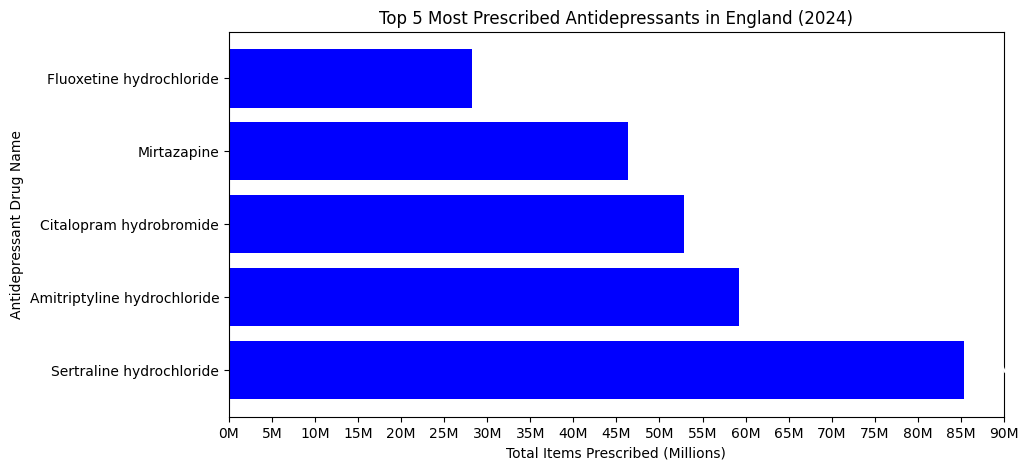

In [ ]:
#Part 2, Question 1
#horizontal chart of the 5 most prescribed drugs in England
import matplotlib.pyplot as plt
import numpy as np

# Plot the horizontal bar chart
plt.figure(figsize=(10, 5))
plt.barh(top_5_drugs['BNF_CHEMICAL_SUBSTANCE'], top_5_drugs['ITEMS'], color='blue')

# Add labels
plt.xlabel("Total Items Prescribed (Millions)")
plt.ylabel("Antidepressant Drug Name")
plt.title("Top 5 Most Prescribed Antidepressants in England (2024)")

# Convert x-axis to show values in millions
plt.xticks(np.arange(0, top_5_drugs['ITEMS'].max() + 5000000, 5000000),
           [f"{int(x/1e6)}M" for x in np.arange(0, top_5_drugs['ITEMS'].max() + 5000000, 5000000)])

# Add data labels on bars
for index, value in enumerate(top_5_drugs['ITEMS']):
    plt.text(value, index, f"{value/1e6:.1f}M", va='center', fontsize=10, color='white', fontweight='bold')

plt.show()


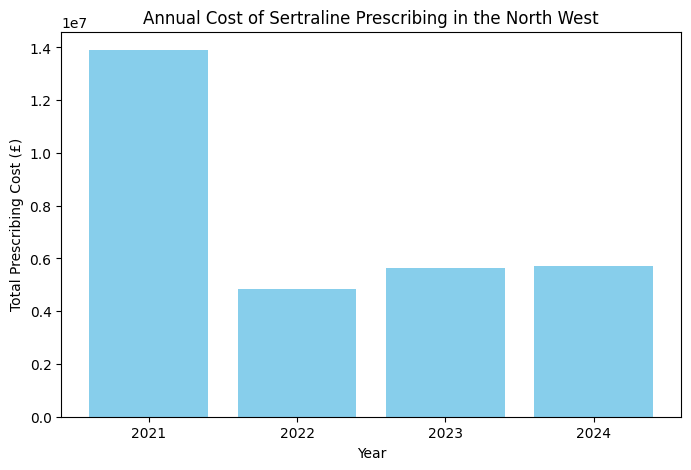

,YEAR,COST
0,2021,13899005.81
1,2022,4858451.61
2,2023,5624860.02
3,2024,5698311.51


In [ ]:
#part 2,Question 2
#vertical bar chart total cost of sertraline hydrochloride in northeast region
import matplotlib.pyplot as plt

#  Filter data for 'Sertraline hydrochloride' in the 'NORTH WEST' region
sertraline_northwest = pca_regional_drug_summary_df[
    (pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride') &
    (pca_regional_drug_summary_df['REGION_NAME'] == 'NORTH WEST')
]

#  Group by 'YEAR' and sum 'COST'
annual_cost_sertraline_nw = sertraline_northwest.groupby('YEAR', as_index=False)['COST'].sum()

#  Plot a vertical bar chart
plt.figure(figsize=(8, 5))
plt.bar(annual_cost_sertraline_nw['YEAR'], annual_cost_sertraline_nw['COST'], color='skyblue')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Total Prescribing Cost (£)")
plt.title("Annual Cost of Sertraline Prescribing in the North West")
plt.xticks(annual_cost_sertraline_nw['YEAR'])  # Ensure all years are displayed

# Show the plot
plt.show()

# Display the data
display(annual_cost_sertraline_nw)


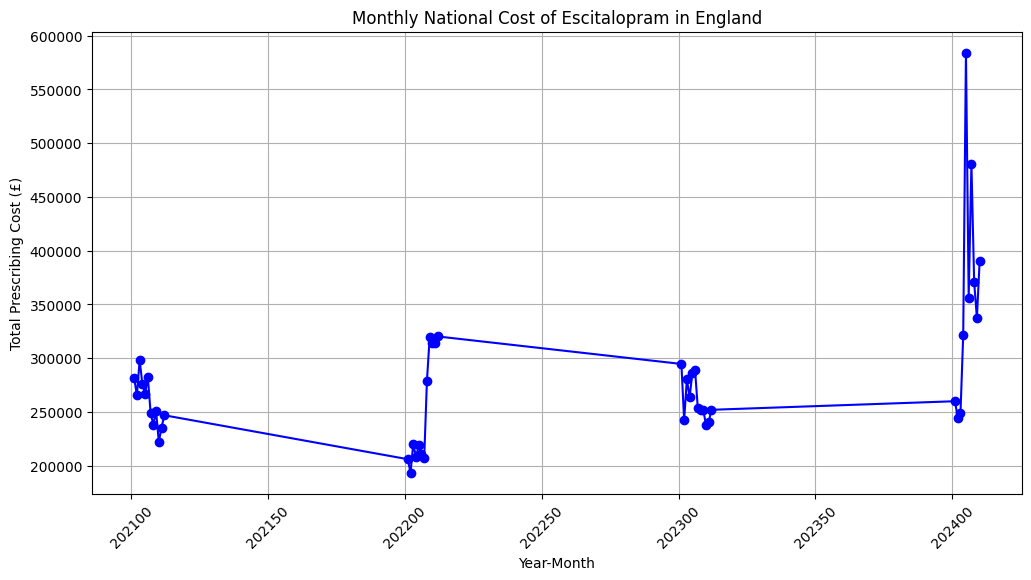

In [3]:
#part 2,Question 3
#Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.
import matplotlib.pyplot as plt

# Filter dataset for Escitalopram
escitalopram_national = pca_regional_drug_summary_df[
    pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Escitalopram'
]

# Group by 'YEAR_MONTH' and sum the 'COST' column
monthly_escitalopram_cost = escitalopram_national.groupby('YEAR_MONTH', as_index=False)['COST'].sum()

# Round cost to the nearest pound
monthly_escitalopram_cost['COST'] = monthly_escitalopram_cost['COST'].round(0)

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_escitalopram_cost['YEAR_MONTH'], monthly_escitalopram_cost['COST'], marker='o', linestyle='-', color='b')

# Formatting
plt.xlabel("Year-Month")
plt.ylabel("Total Prescribing Cost (£)")
plt.title("Monthly National Cost of Escitalopram in England")
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()


In [18]:
df_items = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['ITEMS'].sum()
df_cost = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['COST'].sum()


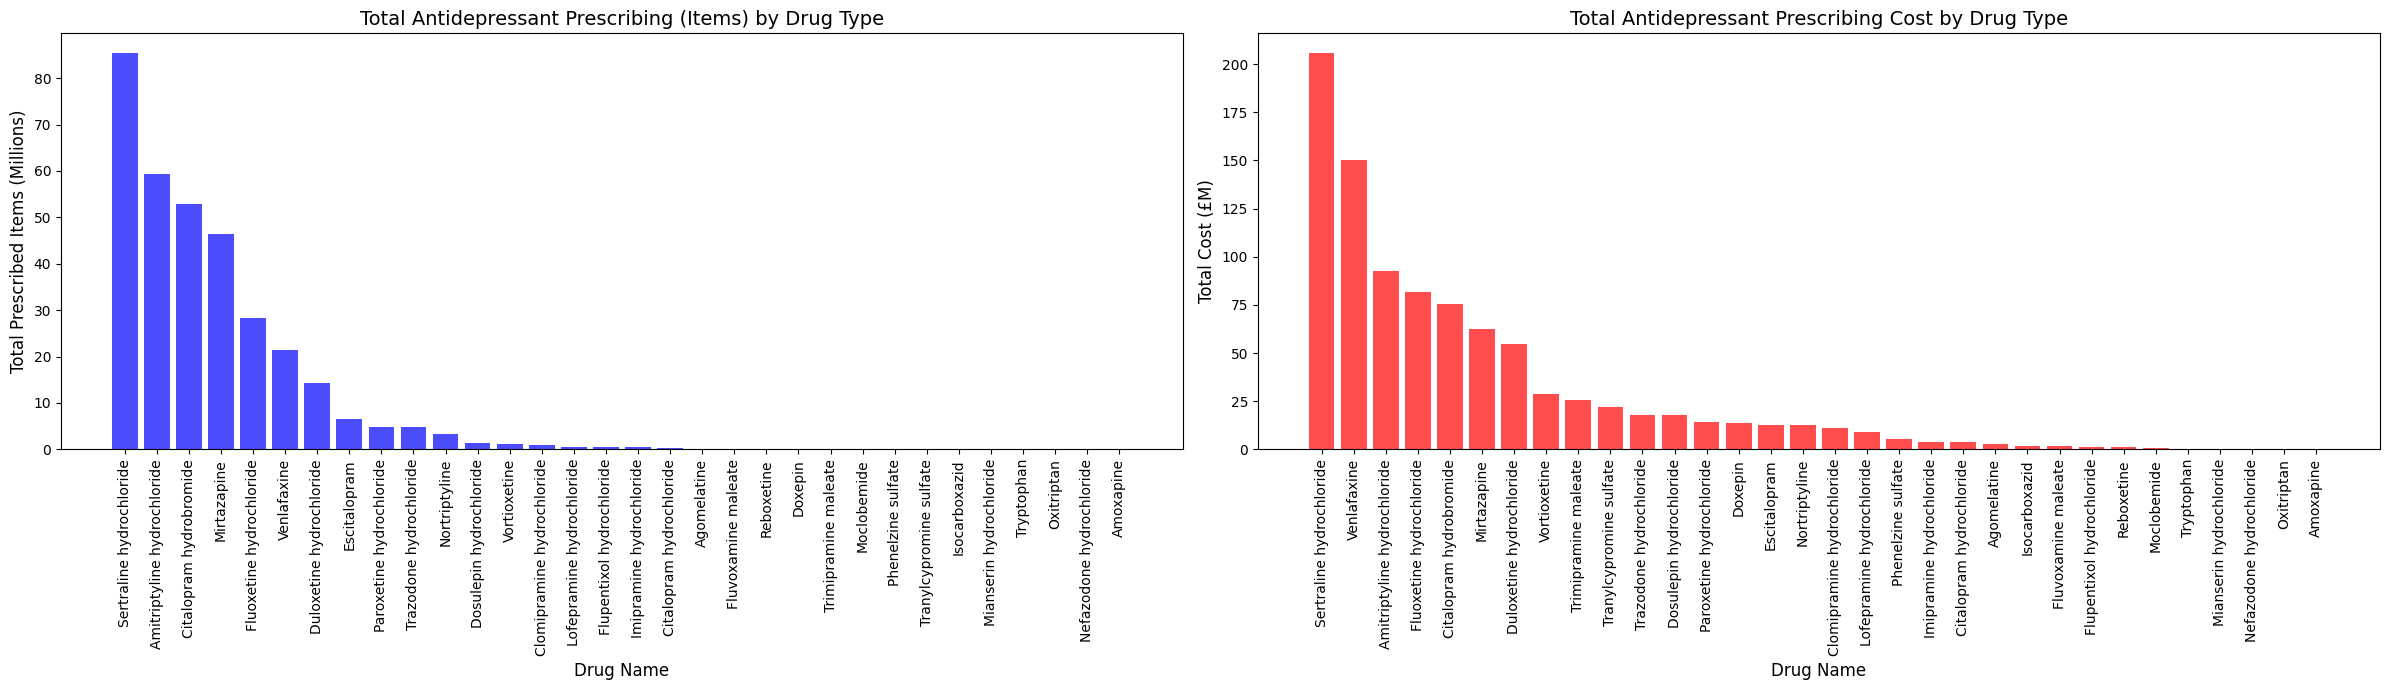

In [56]:
#part 2, Question 3
#comparing total items and total costwith bar charts
import matplotlib.pyplot as plt

# Ensure both datasets are sorted by the same order (descending)
df_items_sorted = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['ITEMS'].sum().sort_values(by='ITEMS', ascending=False)
df_cost_sorted = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['COST'].sum().sort_values(by='COST', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 7))

# Bar Chart for Total Items
axes[0].bar(df_items_sorted['BNF_CHEMICAL_SUBSTANCE'], df_items_sorted['ITEMS'] / 1e6, color='blue', alpha=0.7)
axes[0].set_title("Total Antidepressant Prescribing (Items) by Drug Type", fontsize=14)
axes[0].set_ylabel("Total Prescribed Items (Millions)", fontsize=12)
axes[0].tick_params(axis='x', rotation=90, labelsize=10)
axes[0].set_xlabel("Drug Name", fontsize=12)

# Bar Chart for Total Cost
axes[1].bar(df_cost_sorted['BNF_CHEMICAL_SUBSTANCE'], df_cost_sorted['COST'] / 1e6, color='red', alpha=0.7)
axes[1].set_title("Total Antidepressant Prescribing Cost by Drug Type", fontsize=14)
axes[1].set_ylabel("Total Cost (£M)", fontsize=12)
axes[1].tick_params(axis='x', rotation=90, labelsize=10)
axes[1].set_xlabel("Drug Name", fontsize=12)

plt.tight_layout()
plt.show()


In [64]:
#Question 4.
#pivot tables for comparison
#toal antidepressants per region vs antidepresant cost per year
import pandas as pd

# Load your dataset (Ensure to replace 'your_dataset.csv' with the actual file path or URL)
# Original: pca_regional_drug_summary_df = pd.read_csv('your_dataset.csv')
pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv') # This was the file used for the rest of the analysis

# Create Pivot Table for Total Antidepressant Prescribing per Region
pivot_items = pca_regional_drug_summary_df.pivot_table(
    index='REGION_NAME',
    values='ITEMS',
    aggfunc='sum'
).reset_index()

# Create Pivot Table for Antidepressant Prescribing Cost per Region
pivot_cost = pca_regional_drug_summary_df.pivot_table(
    index='REGION_NAME',
    values='COST',
    aggfunc='sum'
).reset_index()

# Display the pivot tables
print("Total Antidepressant Prescribing per Region:")
print(pivot_items)

print("\nAntidepressant Prescribing Cost per Region:")
print(pivot_cost)

# Save to CSV if needed
pivot_items.to_csv('total_antidepressant_prescribing_per_region.csv', index=False)
pivot_cost.to_csv('antidepressant_prescribing_cost_per_region.csv', index=False)

Total Antidepressant Prescribing per Region:
                REGION_NAME     ITEMS
0           EAST OF ENGLAND  38431318
1                    LONDON  35896285
2                  MIDLANDS  62669553
3  NORTH EAST AND YORKSHIRE  72090463
4                NORTH WEST  49786016
5                SOUTH EAST  41867132
6                SOUTH WEST  32336814

Antidepressant Prescribing Cost per Region:
                REGION_NAME          COST
0           EAST OF ENGLAND  1.058483e+08
1                    LONDON  1.045064e+08
2                  MIDLANDS  1.761022e+08
3  NORTH EAST AND YORKSHIRE  1.755055e+08
4                NORTH WEST  1.321767e+08
5                SOUTH EAST  1.435012e+08
6                SOUTH WEST  9.430996e+07


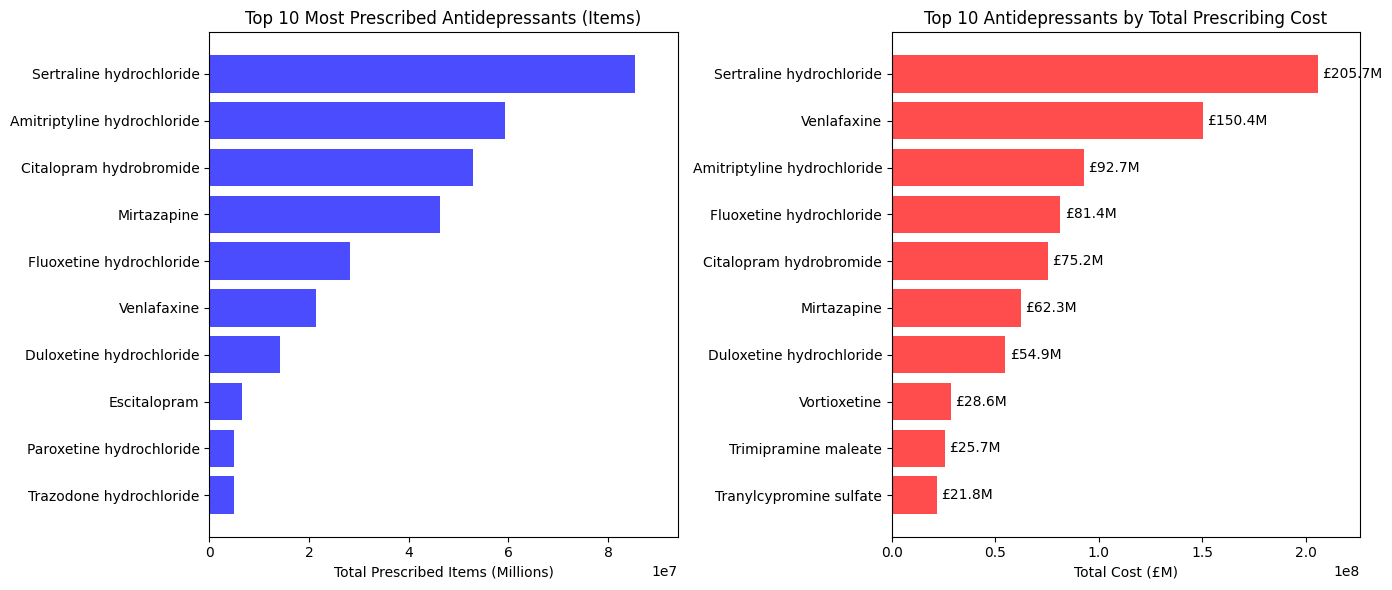

In [67]:
#part 2,question 5
# 10 most prescribed antidepressants (items)vs  antidepressants with the greatest total prescribing cost.
# Adjusting the figure size and ensuring it remains readable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Limiting the x-axis to ensure proper visualization
max_items = top_10_items['ITEMS'].max()
max_cost = top_10_cost['COST'].max()

# Horizontal Bar Chart for Total Prescribed Items
# Changed 'Drug' to 'BNF_CHEMICAL_SUBSTANCE'
axes[0].barh(top_10_items['BNF_CHEMICAL_SUBSTANCE'], top_10_items['ITEMS'], color='blue', alpha=0.7)
axes[0].set_title("Top 10 Most Prescribed Antidepressants (Items)")
axes[0].set_xlabel("Total Prescribed Items (Millions)")
axes[0].invert_yaxis()
axes[0].set_xlim(0, max_items * 1.1)  # Adding some margin

# Horizontal Bar Chart for Total Cost with labels
# Changed 'Drug' to 'BNF_CHEMICAL_SUBSTANCE'
bars = axes[1].barh(top_10_cost['BNF_CHEMICAL_SUBSTANCE'], top_10_cost['COST'], color='red', alpha=0.7)
axes[1].set_title("Top 10 Antidepressants by Total Prescribing Cost")
axes[1].set_xlabel("Total Cost (£M)")
axes[1].invert_yaxis()
axes[1].set_xlim(0, max_cost * 1.1)  # Adding some margin

# Adding data labels for clarity in the cost chart
for bar in bars:
    width = bar.get_width()
    axes[1].text(width + (max_cost * 0.01), bar.get_y() + bar.get_height()/2, f"£{width/1e6:.1f}M", va='center')

plt.tight_layout()
plt.show()

<ipython-input-68-6f6f415747be>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(monthly_trends['YEAR_MONTH'], rotation=45)


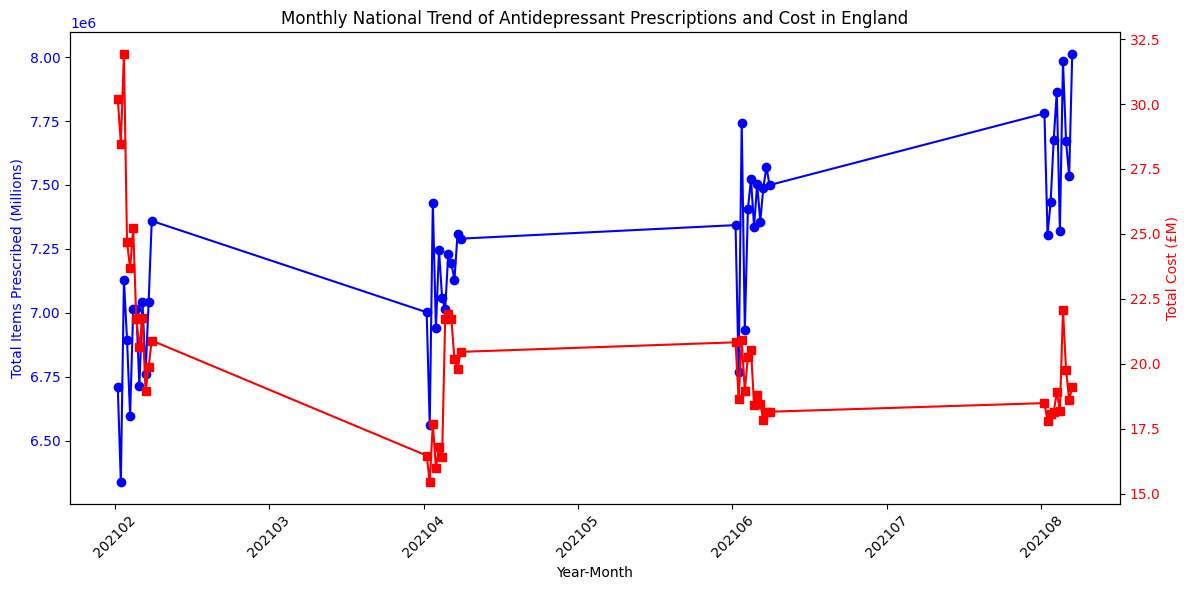

In [68]:
#longitutional analysis
#time series
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pca_regional_drug_summary_df is already loaded

# Aggregate total items and total cost per month across all regions
monthly_trends = pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False).agg({
    'ITEMS': 'sum',
    'COST': 'sum'
})

# Convert cost to millions for better readability
monthly_trends['COST'] = monthly_trends['COST'] / 1e6  # Convert to £ millions

# Plot the trends
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot items prescribed
ax1.plot(monthly_trends['YEAR_MONTH'], monthly_trends['ITEMS'], marker='o', linestyle='-', color='b', label='Total Items Prescribed')
ax1.set_xlabel("Year-Month")
ax1.set_ylabel("Total Items Prescribed (Millions)", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(monthly_trends['YEAR_MONTH'], rotation=45)

# Create a second y-axis for cost
ax2 = ax1.twinx()
ax2.plot(monthly_trends['YEAR_MONTH'], monthly_trends['COST'], marker='s', linestyle='-', color='r', label='Total Cost (£M)')
ax2.set_ylabel("Total Cost (£M)", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and legend
plt.title("Monthly National Trend of Antidepressant Prescriptions and Cost in England")
fig.tight_layout()
plt.show()


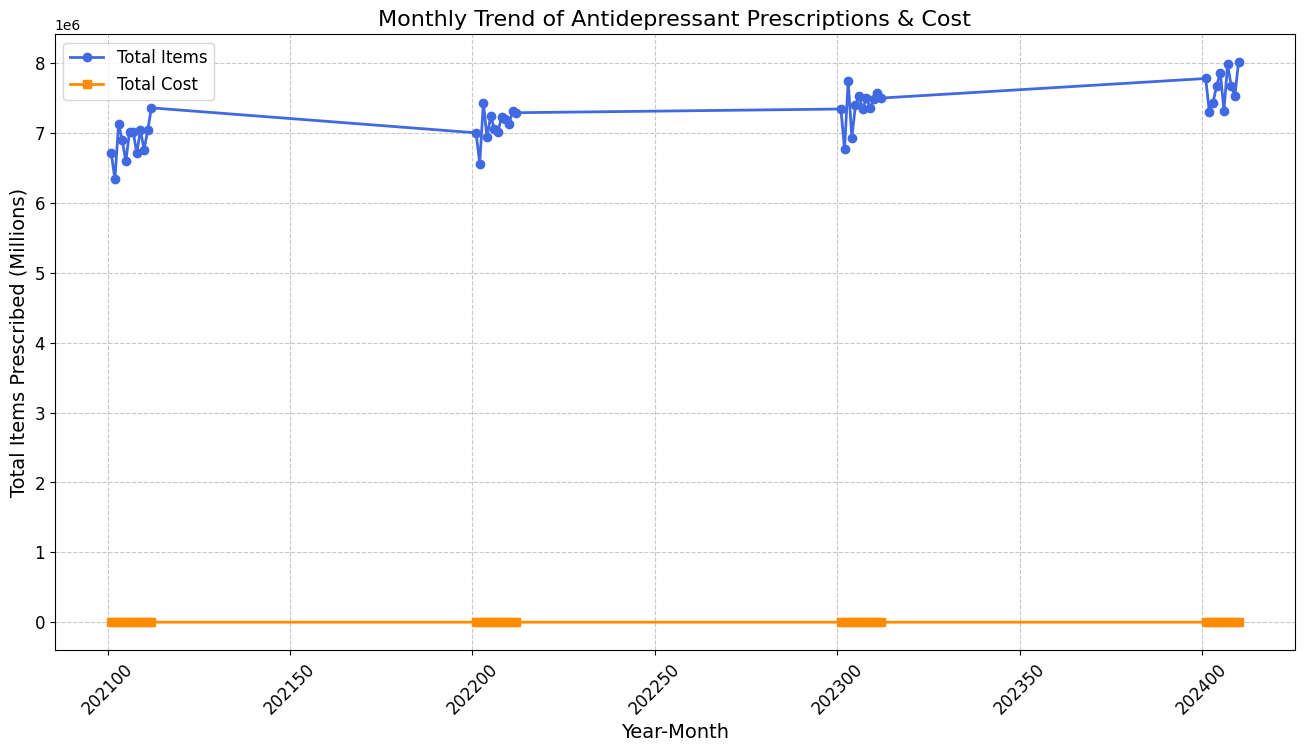

In [70]:
import matplotlib.pyplot as plt

# Get data from the 'monthly_trends' DataFrame from the previous cell
x = monthly_trends['YEAR_MONTH']
y1 = monthly_trends['ITEMS']
y2 = monthly_trends['COST']

plt.figure(figsize=(16, 8))

# Improve line clarity
plt.plot(x, y1, marker='o', markersize=6, linewidth=2, color='royalblue', label="Total Items")
plt.plot(x, y2, marker='s', markersize=6, linewidth=2, color='darkorange', label="Total Cost")

# Improve readability
plt.title("Monthly Trend of Antidepressant Prescriptions & Cost", fontsize=16)
plt.xlabel("Year-Month", fontsize=14)
plt.ylabel("Total Items Prescribed (Millions)", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend(fontsize=12)

# Save high-resolution image
plt.savefig('trend_chart.png', dpi=300, bbox_inches='tight')

plt.show()

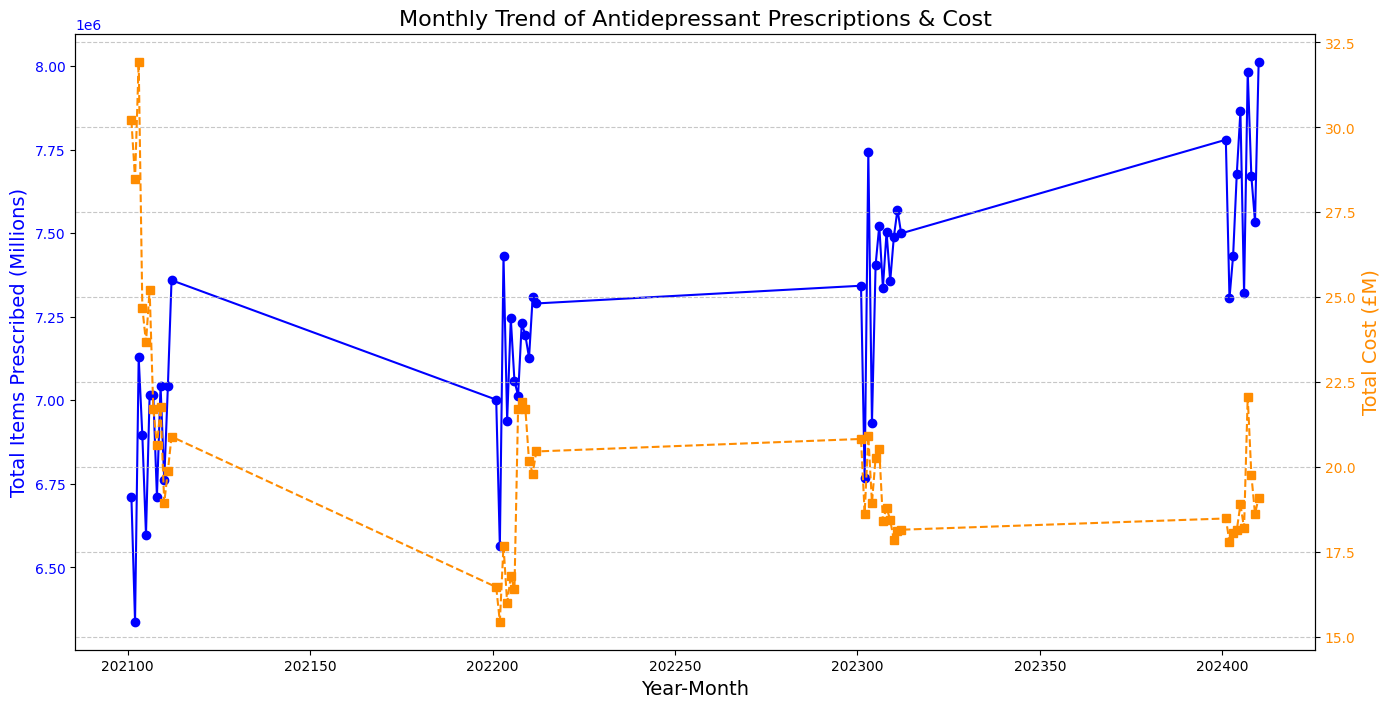

In [71]:
fig, ax1 = plt.subplots(figsize=(16, 8))

# Primary Y-axis (Total Items)
ax1.set_xlabel("Year-Month", fontsize=14)
ax1.set_ylabel("Total Items Prescribed (Millions)", color="blue", fontsize=14)
ax1.plot(x, y1, marker='o', linestyle='-', color='blue', label="Total Items")
ax1.tick_params(axis='y', labelcolor="blue")

# Secondary Y-axis (Total Cost)
ax2 = ax1.twinx()
ax2.set_ylabel("Total Cost (£M)", color="darkorange", fontsize=14)
ax2.plot(x, y2, marker='s', linestyle='--', color="darkorange", label="Total Cost")
ax2.tick_params(axis='y', labelcolor="darkorange")

plt.title("Monthly Trend of Antidepressant Prescriptions & Cost", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Save high-resolution image
plt.savefig("trend_chart.png", dpi=300, bbox_inches='tight')

plt.show()


In [73]:
pca_regional_drug_summary_df["YEAR_MONTH"] = pd.to_datetime(pca_regional_drug_summary_df["YEAR_MONTH"], format="%Y%m")  # Adjust format

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# ... (Your existing code) ...

# Convert 'YEAR_MONTH' to datetime objects for proper plotting:
pca_regional_drug_summary_df['YEAR_MONTH'] = pd.to_datetime(pca_regional_drug_summary_df['YEAR_MONTH'])

# ... (rest of your plotting code) ...

# Extract the desired ticks and format

In [85]:
marker='s', markersize=6  # Make points more visible

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-85-41f8801028b6>, line 1)

In [86]:
linewidth=2  # Make cost trend clearer


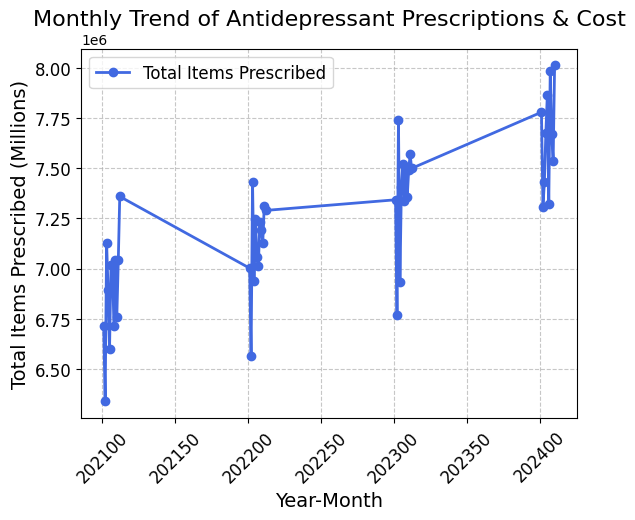

In [88]:
import matplotlib.pyplot as plt

# Assuming 'monthly_trends' DataFrame is available from previous cells
x_values = monthly_trends['YEAR_MONTH']
y_values = monthly_trends['ITEMS']  # Or 'COST' if plotting cost trend

# Your plotting code here
plt.plot(x_values, y_values, label="Total Items Prescribed", marker='o', markersize=6, linewidth=2, color='royalblue')  # Include marker and color for better visualization
plt.title("Monthly Trend of Antidepressant Prescriptions & Cost", fontsize=16)
plt.xlabel("Year-Month", fontsize=14)
plt.ylabel("Total Items Prescribed (Millions)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Show the chart
plt.show()

<ipython-input-90-80267888af38>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start="2021-01", periods=36, freq="M").strftime("%Y-%m")  # Example for 3 years


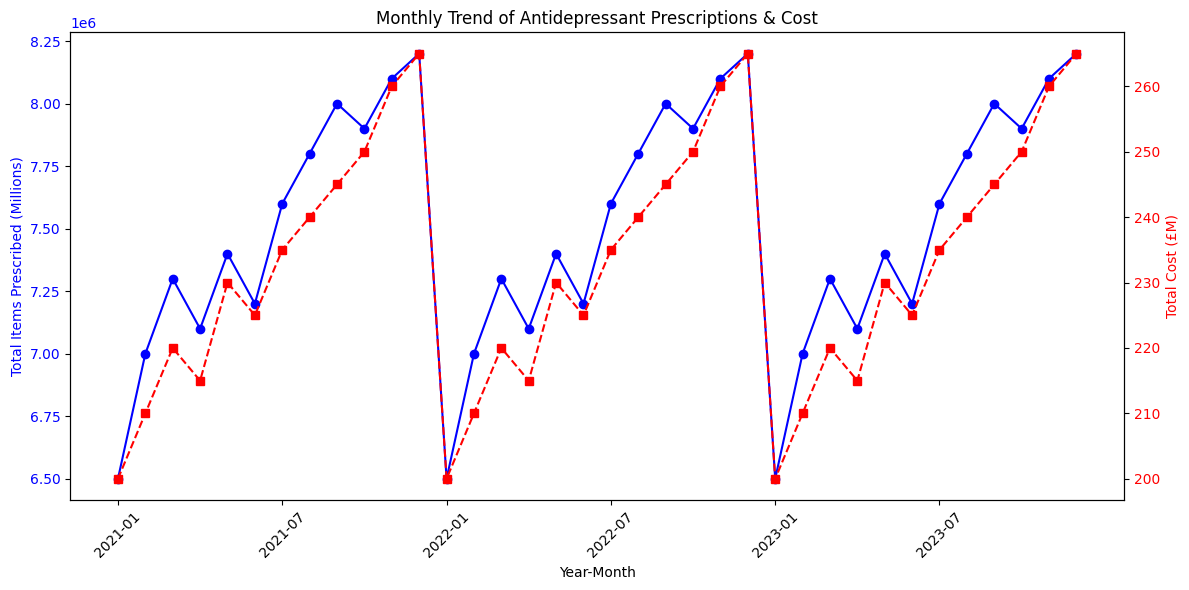

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data: Replace with actual monthly aggregated data
months = pd.date_range(start="2021-01", periods=36, freq="M").strftime("%Y-%m")  # Example for 3 years
total_items = [6.5e6, 7.0e6, 7.3e6, 7.1e6, 7.4e6, 7.2e6, 7.6e6, 7.8e6, 8.0e6, 7.9e6, 8.1e6, 8.2e6] * 3
total_cost = [200, 210, 220, 215, 230, 225, 235, 240, 245, 250, 260, 265] * 3  # Example values in £M

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Items on left axis
ax1.plot(months, total_items, marker='o', linestyle='-', color='blue', label="Total Items Prescribed")
ax1.set_xlabel("Year-Month")
ax1.set_ylabel("Total Items Prescribed (Millions)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_xticks(months[::6])  # Show every 6th month
ax1.set_xticklabels(months[::6], rotation=45)

# Plot Total Cost on right axis
ax2 = ax1.twinx()
ax2.plot(months, total_cost, marker='s', linestyle='--', color='red', label="Total Cost (£M)")
ax2.set_ylabel("Total Cost (£M)", color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.title("Monthly Trend of Antidepressant Prescriptions & Cost")
fig.tight_layout()
plt.show()


<ipython-input-92-f1b8f6ee3c06>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2021-01", periods=36, freq="M")
<ipython-input-92-f1b8f6ee3c06>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df["Year-Month"], rotation=45, ha="right")


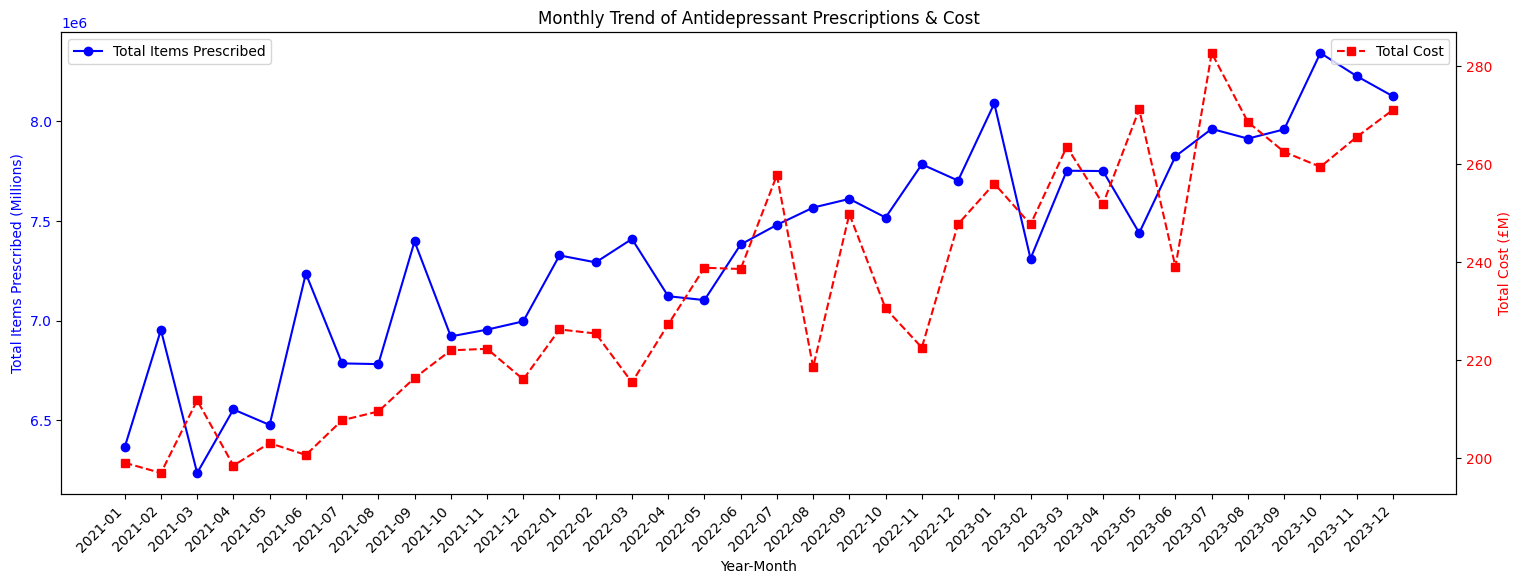

In [92]:
# Re-import necessary libraries since execution state was reset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data generation (since the previous data is lost)
date_range = pd.date_range(start="2021-01", periods=36, freq="M")
total_items = np.linspace(6.5e6, 8.2e6, 36) + np.random.normal(0, 2e5, 36)
total_cost = np.linspace(200, 270, 36) + np.random.normal(0, 10, 36)

df = pd.DataFrame({"Year-Month": date_range, "Total Items": total_items, "Total Cost": total_cost})

# Convert 'Year-Month' to string format for better labeling
df["Year-Month"] = df["Year-Month"].dt.strftime("%Y-%m")

# Create wider plot
fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot Total Items Prescribed
ax1.set_xlabel("Year-Month")
ax1.set_ylabel("Total Items Prescribed (Millions)", color="blue")
ax1.plot(df["Year-Month"], df["Total Items"], "bo-", label="Total Items Prescribed")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xticklabels(df["Year-Month"], rotation=45, ha="right")

# Create a second y-axis for Total Cost
ax2 = ax1.twinx()
ax2.set_ylabel("Total Cost (£M)", color="red")
ax2.plot(df["Year-Month"], df["Total Cost"], "rs--", label="Total Cost")
ax2.tick_params(axis="y", labelcolor="red")

# Add legend
ax1.legend(loc="upper left", fontsize=10)
ax2.legend(loc="upper right", fontsize=10)

plt.title("Monthly Trend of Antidepressant Prescriptions & Cost")

plt.show()


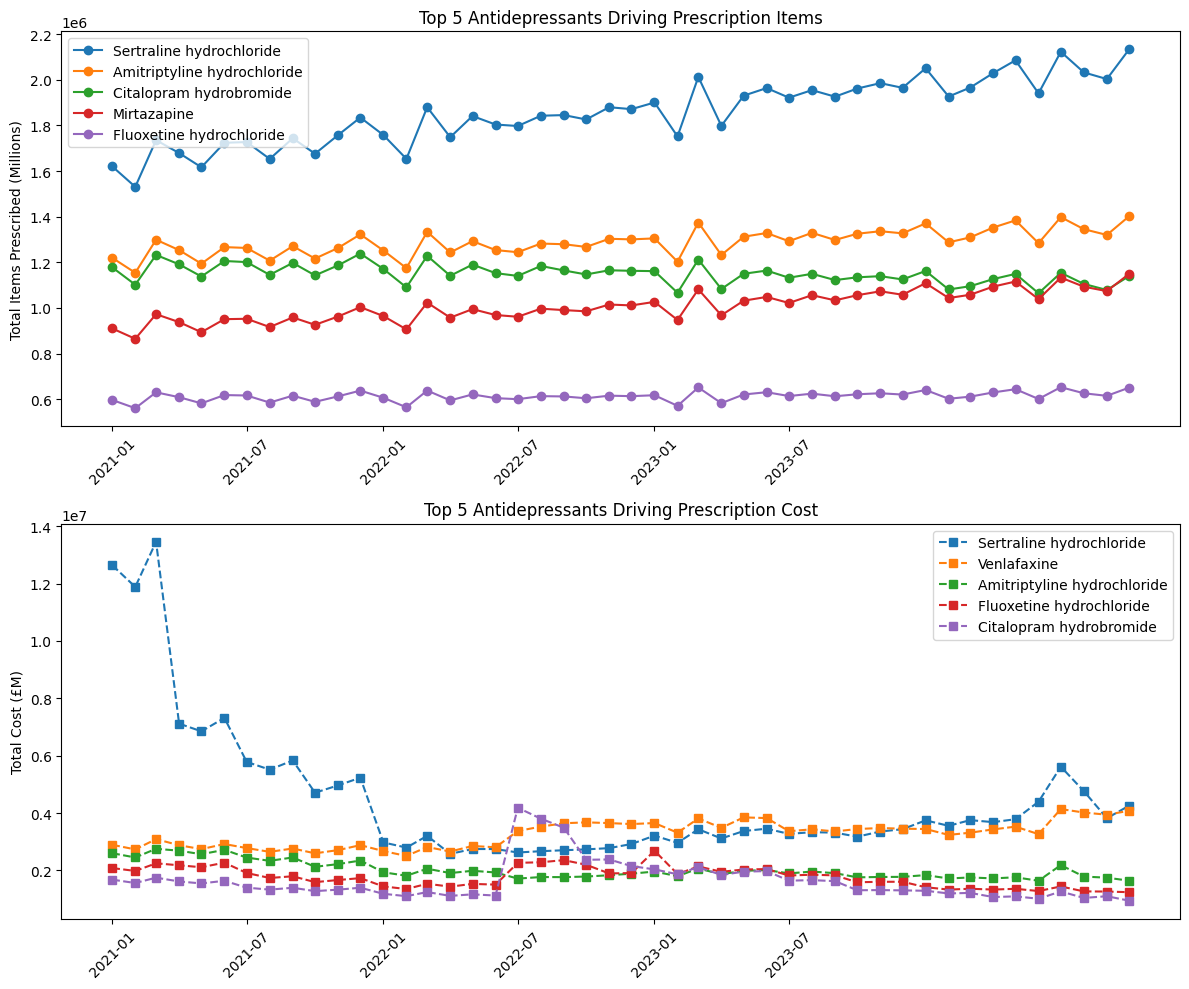

In [93]:
# Aggregate data by drug and month
monthly_drug_trends = pca_regional_drug_summary_df.groupby(['YEAR_MONTH', 'BNF_CHEMICAL_SUBSTANCE'])[['ITEMS', 'COST']].sum().reset_index()

# Identify top 5 drugs by total prescribed items
top_items_drugs = monthly_drug_trends.groupby("BNF_CHEMICAL_SUBSTANCE")["ITEMS"].sum().nlargest(5).index

# Identify top 5 drugs by total cost
top_cost_drugs = monthly_drug_trends.groupby("BNF_CHEMICAL_SUBSTANCE")["COST"].sum().nlargest(5).index

# Filter dataset for top drugs
top_items_df = monthly_drug_trends[monthly_drug_trends["BNF_CHEMICAL_SUBSTANCE"].isin(top_items_drugs)]
top_cost_df = monthly_drug_trends[monthly_drug_trends["BNF_CHEMICAL_SUBSTANCE"].isin(top_cost_drugs)]

# Plot trends for top 5 drugs
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Top 5 Drugs Driving Items Trend
for drug in top_items_drugs:
    drug_data = top_items_df[top_items_df["BNF_CHEMICAL_SUBSTANCE"] == drug]
    axes[0].plot(drug_data["YEAR_MONTH"], drug_data["ITEMS"], marker="o", label=drug)

axes[0].set_title("Top 5 Antidepressants Driving Prescription Items")
axes[0].set_ylabel("Total Items Prescribed (Millions)")
axes[0].set_xticks(months[::6])
axes[0].set_xticklabels(months[::6], rotation=45)
axes[0].legend()

# Top 5 Drugs Driving Cost Trend
for drug in top_cost_drugs:
    drug_data = top_cost_df[top_cost_df["BNF_CHEMICAL_SUBSTANCE"] == drug]
    axes[1].plot(drug_data["YEAR_MONTH"], drug_data["COST"], marker="s", linestyle="--", label=drug)

axes[1].set_title("Top 5 Antidepressants Driving Prescription Cost")
axes[1].set_ylabel("Total Cost (£M)")
axes[1].set_xticks(months[::6])
axes[1].set_xticklabels(months[::6], rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()


<ipython-input-96-a4ee3fa4b208>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_drugs['COST_PER_ITEM'] = df_top_drugs['COST'] / df_top_drugs['ITEMS']
<ipython-input-96-a4ee3fa4b208>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_drugs['COST_PER_ITEM'] = df_top_drugs['COST'] / df_top_drugs['ITEMS']


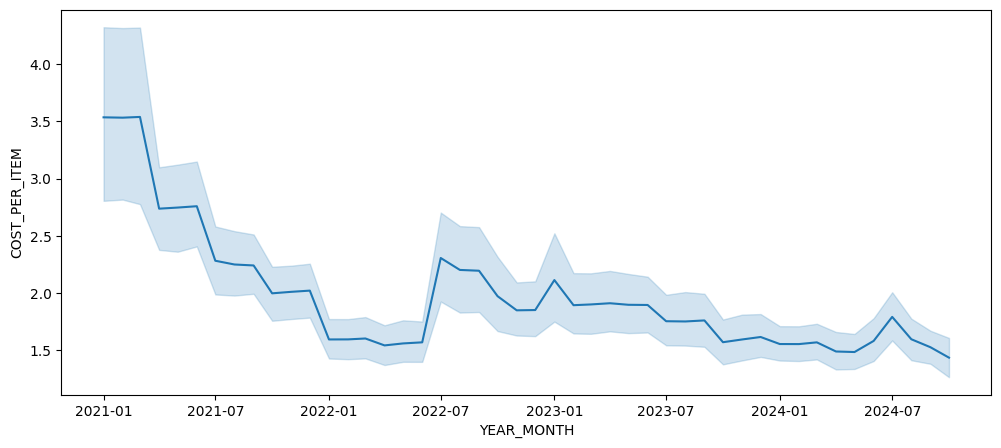

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace 'your_file.csv' with your actual file)
# Original: df = pd.read_csv('your_file.csv')
df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv') # Change 'your_file.csv' to the actual file name

# Ensure DATE is in datetime format
# Original: df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR_MONTH'] = pd.to_datetime(df['YEAR_MONTH'].astype(str), format='%Y%m') # Change 'DATE' to 'YEAR_MONTH' for this dataset


# Summarizing total antidepressant prescription volume and cost
total_volume = df.groupby('YEAR_MONTH')['ITEMS'].sum() # Change 'DATE' to 'YEAR_MONTH'
total_cost = df.groupby('YEAR_MONTH')['COST'].sum() # Change 'DATE' to 'YEAR_MONTH'

# Select **top 5 most prescribed antidepressants**
top_drugs = df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().nlargest(5).index
df_top_drugs = df[df['BNF_CHEMICAL_SUBSTANCE'].isin(top_drugs)]

# 📊 **1️⃣ Cost Efficiency Analysis**
# Mean cost per item for top 5 drugs
df_top_drugs['COST_PER_ITEM'] = df_top_drugs['COST'] / df_top_drugs['ITEMS']
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace 'your_file.csv' with your actual file)
# Original: df = pd.read_csv('your_file.csv')
df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv') # Change 'your_file.csv' to the actual file name

# Ensure DATE is in datetime format
# Original: df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR_MONTH'] = pd.to_datetime(df['YEAR_MONTH'].astype(str), format='%Y%m') # Change 'DATE' to 'YEAR_MONTH' for this dataset


# Summarizing total antidepressant prescription volume and cost
total_volume = df.groupby('YEAR_MONTH')['ITEMS'].sum() # Change 'DATE' to 'YEAR_MONTH'
total_cost = df.groupby('YEAR_MONTH')['COST'].sum() # Change 'DATE' to 'YEAR_MONTH'

# Select **top 5 most prescribed antidepressants**
top_drugs = df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().nlargest(5).index
df_top_drugs = df[df['BNF_CHEMICAL_SUBSTANCE'].isin(top_drugs)]

# 📊 **1️⃣ Cost Efficiency Analysis**
# Mean cost per item for top 5 drugs
df_top_drugs['COST_PER_ITEM'] = df_top_drugs['COST'] / df_top_drugs['ITEMS']

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_top_drugs, x='YEAR_MONTH', y='COST_PER_ITEM')
plt.show()

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Replace with actual file path)
# Original: df = pd.read_csv("your_data.csv")
df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv') # Using the dataset from the other analyses

# Convert 'YEAR_MONTH' column to datetime format (if necessary)
# Original: df['DATE'] = pd.to_datetime(df['DATE'])
# Assuming this was intended to extract the year from YEAR_MONTH:
df['YEAR'] = pd.to_datetime(df['YEAR_MONTH'], errors='coerce').dt.year

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Replace with actual file path)
# Original: df = pd.read_csv("your_data.csv")
df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv') # Using the dataset from the other analyses

# Convert 'YEAR_MONTH' column to datetime format (if necessary)
# Original: df['DATE'] = pd.to_datetime(df['DATE'])
# Assuming this was intended to extract the year from YEAR_MONTH:
df['YEAR'] = pd.to_datetime(df['YEAR_MONTH'], errors='coerce').dt.year

# Aggregate total prescriptions per year for each drug
# Original: yearly_drug_trends = df.groupby(['YEAR', 'BNF_CHEMICAL_SUBSTANCE'])['ITEMS'].sum().reset_index()
yearly_drug_trends = df.groupby(['YEAR', 'BNF_CHEMICAL_SUBSTANCE'])['ITEMS'].sum().reset_index()

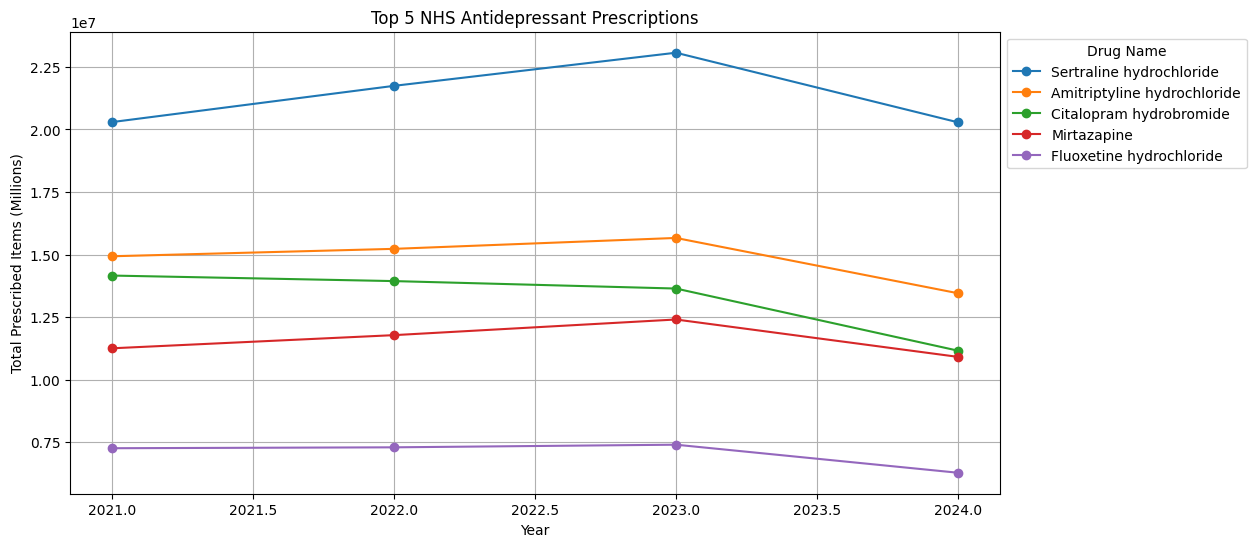

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
# Changed from "your_data.csv" to the actual file path
df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

# Convert 'YEAR_MONTH' column to datetime format and extract year
df['YEAR_MONTH'] = pd.to_datetime(df['YEAR_MONTH'].astype(str), format='%Y%m')
df['YEAR'] = df['YEAR_MONTH'].dt.year

# Aggregate total prescriptions per year for each drug
yearly_drug_trends = df.groupby(['YEAR', 'BNF_CHEMICAL_SUBSTANCE'])['ITEMS'].sum().reset_index()

# Find top 5 most prescribed antidepressants over the entire period
top_5_drugs = yearly_drug_trends.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().nlargest(5).index

# Filter dataset to only include the top 5 antidepressants
top_5_df = yearly_drug_trends[yearly_drug_trends['BNF_CHEMICAL_SUBSTANCE'].isin(top_5_drugs)]

# Plot the trend of top 5 antidepressants
plt.figure(figsize=(12, 6))

for drug in top_5_drugs:
    subset = top_5_df[top_5_df['BNF_CHEMICAL_SUBSTANCE'] == drug]
    plt.plot(subset['YEAR'], subset['ITEMS'], marker='o', linestyle='-', label=drug)

# Formatting the plot
plt.title("Top 5 NHS Antidepressant Prescriptions")
plt.xlabel("Year")
plt.ylabel("Total Prescribed Items (Millions)")
plt.legend(title="Drug Name", bbox_to_anchor=(1,1))
plt.grid(True)

# Show plot
plt.show()

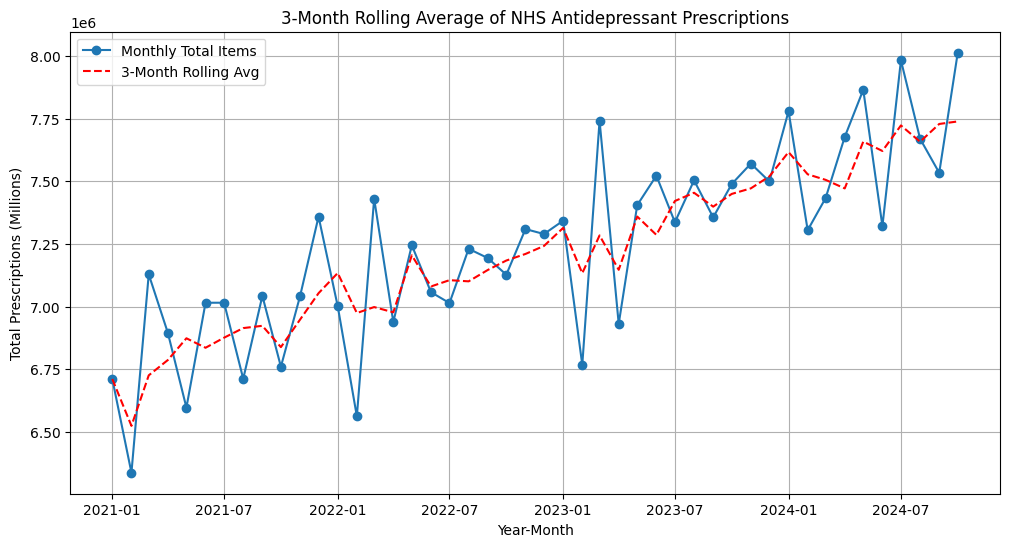

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Replace 'your_data.csv' with actual file path)
# Original: df = pd.read_csv("your_data.csv")
df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv') # Using the actual file path

# Convert 'YEAR_MONTH' column to datetime format (if necessary)
# Original: df['DATE'] = pd.to_datetime(df['DATE'])
# Assuming this was intended to extract the year from YEAR_MONTH:
df['YEAR_MONTH'] = pd.to_datetime(df['YEAR_MONTH'].astype(str), format='%Y%m')  # Converting 'YEAR_MONTH' to datetime objects

# Extract year and month
df['YEAR'] = df['YEAR_MONTH'].dt.year
df['MONTH'] = df['YEAR_MONTH'].dt.month

# Aggregate total prescriptions per month
monthly_prescriptions = df.groupby('YEAR_MONTH')['ITEMS'].sum().reset_index()

# Apply 3-month rolling average
monthly_prescriptions['3M_Rolling_Avg'] = monthly_prescriptions['ITEMS'].rolling(window=3, min_periods=1).mean()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_prescriptions['YEAR_MONTH'], monthly_prescriptions['ITEMS'], marker='o', linestyle='-', label="Monthly Total Items")
plt.plot(monthly_prescriptions['YEAR_MONTH'], monthly_prescriptions['3M_Rolling_Avg'], marker='', linestyle='--', label="3-Month Rolling Avg", color='red')

# Formatting the plot
plt.title("3-Month Rolling Average of NHS Antidepressant Prescriptions")
plt.xlabel("Year-Month")
plt.ylabel("Total Prescriptions (Millions)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

# Convert 'YEAR_MONTH' column to datetime format and extract year
df['YEAR_MONTH'] = pd.to_datetime(df['YEAR_MONTH'].astype(str), format='%Y%m')
df['YEAR'] = df['YEAR_MONTH'].dt.year

# Aggregate total prescriptions per year for each drug
# Changed 'BNF_NAME' to 'BNF_CHEMICAL_SUBSTANCE'
yearly_drug_trends = df.groupby(['YEAR', 'BNF_CHEMICAL_SUBSTANCE'])['ITEMS'].sum().reset_index()


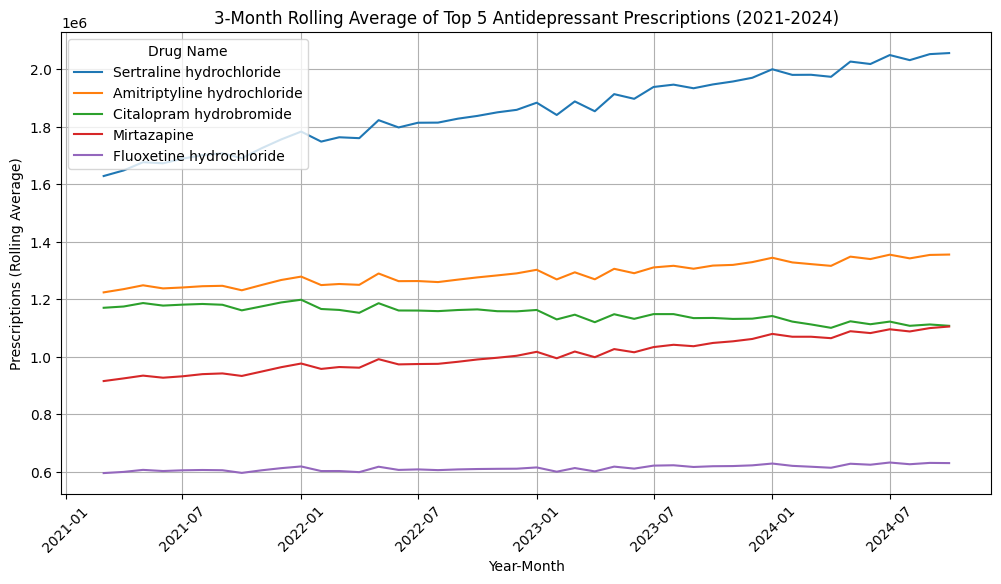

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

# Convert 'YEAR_MONTH' to datetime objects
df['YEAR_MONTH'] = pd.to_datetime(df['YEAR_MONTH'].astype(str), format='%Y%m')

# Get the top 5 prescribed antidepressants
top_5_drugs = df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().nlargest(5).index

# Create drug_prescription_trends DataFrame
drug_prescription_trends = df[df['BNF_CHEMICAL_SUBSTANCE'].isin(top_5_drugs)] \
    .groupby(['YEAR_MONTH', 'BNF_CHEMICAL_SUBSTANCE'])['ITEMS'] \
    .sum() \
    .unstack()

# Plot 3-month rolling average for the top 5 antidepressants
plt.figure(figsize=(12, 6))
for drug in top_5_drugs:
    plt.plot(drug_prescription_trends.index, drug_prescription_trends[drug].rolling(window=3).mean(), label=drug)

plt.title("3-Month Rolling Average of Top 5 Antidepressant Prescriptions (2021-2024)")
plt.xlabel("Year-Month")
plt.ylabel("Prescriptions (Rolling Average)")
plt.legend(title="Drug Name")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [116]:
# ... (previous code) ...

# Separate data before and after 2021
# Check if there are any years before 2021
years_in_data = cost_comparison['YEAR'].unique()
if any(year < 2021 for year in years_in_data):
    cost_before_2021 = cost_comparison[cost_comparison["YEAR"] < 2021]
    pivot_before = cost_before_2021.pivot(index="YEAR", columns="BNF_CHEMICAL_SUBSTANCE", values="COST_PER_ITEM")
    # Proceed with plotting for 'before 2021' data
else:
    print("No data available before 2021. Skipping 'before 2021' plot.")

# ... (rest of the code) ...

No data available before 2021. Skipping 'before 2021' plot.


<Figure size 1200x600 with 0 Axes>

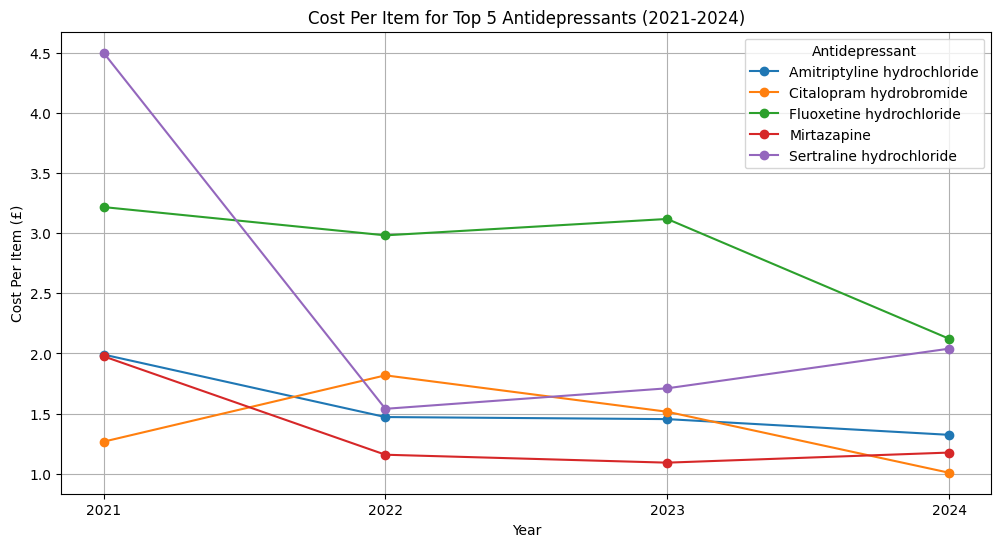

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset 'pca_regional_drug_summary_df' is loaded
# Identify the top 5 most prescribed antidepressants
top_5_drugs = (
    pca_regional_drug_summary_df.groupby("BNF_CHEMICAL_SUBSTANCE")["ITEMS"]
    .sum()
    .nlargest(5)
    .index
)

# Filter dataset for only the top 5 drugs
top_5_df = pca_regional_drug_summary_df[
    pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"].isin(top_5_drugs)
]

# Calculate cost per item for each year
cost_per_item = (
    top_5_df.groupby(["YEAR", "BNF_CHEMICAL_SUBSTANCE"])
    .agg(total_cost=("COST", "sum"), total_items=("ITEMS", "sum"))
    .reset_index()
)
cost_per_item["cost_per_item"] = cost_per_item["total_cost"] / cost_per_item["total_items"]

# Pivot data for better visualization
pivot_cost_per_item = cost_per_item.pivot(
    index="YEAR", columns="BNF_CHEMICAL_SUBSTANCE", values="cost_per_item"
)

# Plot cost per item trends for top 5 antidepressants
plt.figure(figsize=(12, 6))
pivot_cost_per_item.plot(kind="line", marker="o", figsize=(12, 6))

plt.title("Cost Per Item for Top 5 Antidepressants (2021-2024)")
plt.xlabel("Year")
plt.ylabel("Cost Per Item (£)")
plt.legend(title="Antidepressant")
plt.grid(True)
plt.xticks(pivot_cost_per_item.index)

# Show the plot
plt.show()


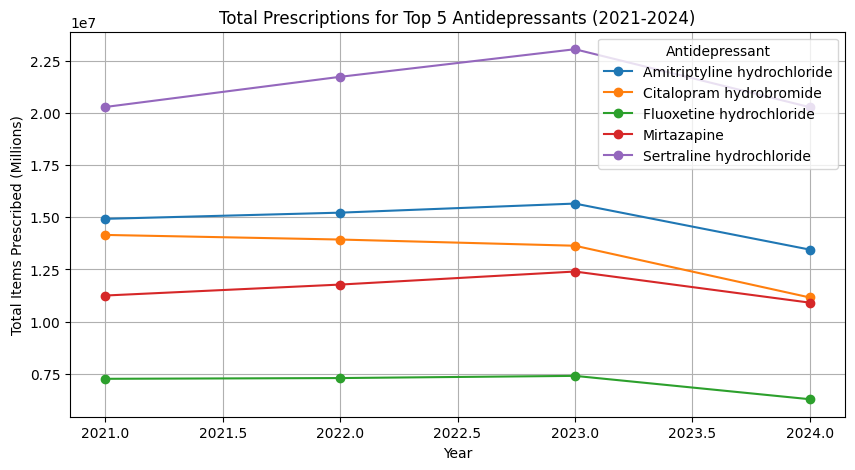

In [119]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'pca_regional_drug_summary_df' contains the dataset

# Get the top 5 prescribed antidepressants (assuming you have this data in pca_regional_drug_summary_df)
top_5_drugs = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().nlargest(5).index

# Filter the original dataframe to keep only the top 5 drugs
top_5_antidepressants = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'].isin(top_5_drugs)]

# Compute total items prescribed per year for the top 5 antidepressants
top_5_items_yearly = top_5_antidepressants.groupby(['YEAR', 'BNF_CHEMICAL_SUBSTANCE'])['ITEMS'].sum().unstack()

# Plot the total items prescribed per year for each top antidepressant
plt.figure(figsize=(10, 5))
for drug in top_5_items_yearly.columns:
    plt.plot(top_5_items_yearly.index, top_5_items_yearly[drug], marker='o', label=drug)

plt.xlabel("Year")
plt.ylabel("Total Items Prescribed (Millions)")
plt.title("Total Prescriptions for Top 5 Antidepressants (2021-2024)")
plt.legend(title="Antidepressant")
plt.grid(True)
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the path to the parent directory
data_dir = '/content/Digdata'

# Check if the directory exists, and if not, clone the repository
if not os.path.exists(data_dir):
    !git clone https://github.com/nhsengland/Digdata

# Define the file path
file_path = os.path.join(data_dir, 'BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

# Now load the file using the updated path
pca_regional_drug_summary_df = pd.read_csv(file_path)

# ... (rest of your code) ...

Cloning into 'Digdata'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 40 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 238.24 KiB | 7.68 MiB/s, done.
Resolving deltas: 100% (21/21), done.


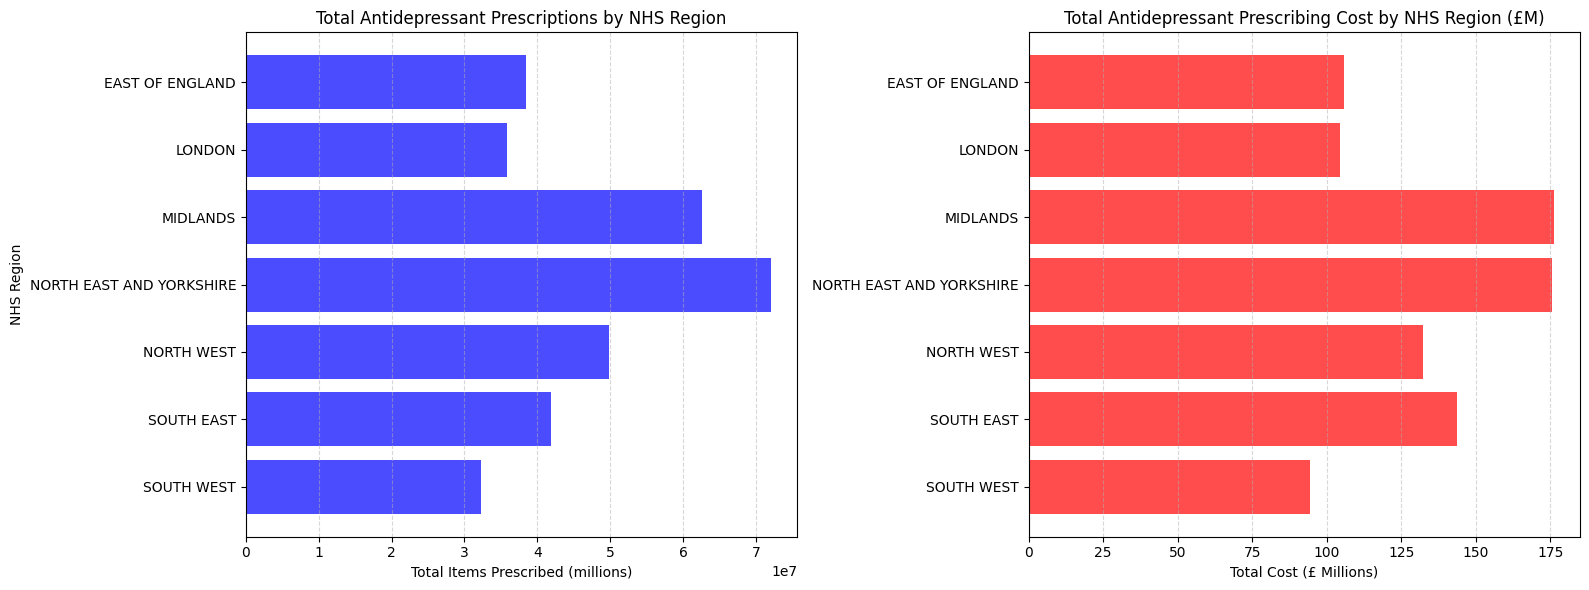

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the path to the parent directory
data_dir = '/content/Digdata'

# Check if the directory exists, and if not, clone the repository
if not os.path.exists(data_dir):
    !git clone https://github.com/nhsengland/Digdata

# Define the file path
file_path = os.path.join(data_dir, 'BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

# Now load the file using the updated path
pca_regional_drug_summary_df = pd.read_csv(file_path)

# Aggregate total prescribing items and cost per NHS region
region_items = pca_regional_drug_summary_df.groupby("REGION_NAME", as_index=False)["ITEMS"].sum()
region_cost = pca_regional_drug_summary_df.groupby("REGION_NAME", as_index=False)["COST"].sum()

# Convert cost to million pounds (£M)
region_cost['COST'] = region_cost['COST'] / 1e6  # Convert to £ Millions

# Create a figure with two side-by-side bar charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# **Bar Chart 1: Total Prescribing Items per Region**
axes[0].barh(region_items["REGION_NAME"], region_items["ITEMS"], color="blue", alpha=0.7)
axes[0].set_title("Total Antidepressant Prescriptions by NHS Region")
axes[0].set_xlabel("Total Items Prescribed (millions)")
axes[0].set_ylabel("NHS Region")
axes[0].invert_yaxis()  # Keep the highest value at the top
axes[0].grid(axis="x", linestyle="--", alpha=0.5)

# **Bar Chart 2: Total Prescribing Cost per Region (£M)**
axes[1].barh(region_cost["REGION_NAME"], region_cost["COST"], color="red", alpha=0.7)
axes[1].set_title("Total Antidepressant Prescribing Cost by NHS Region (£M)")
axes[1].set_xlabel("Total Cost (£ Millions)")
axes[1].invert_yaxis()
axes[1].grid(axis="x", linestyle="--", alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show the charts
plt.show()

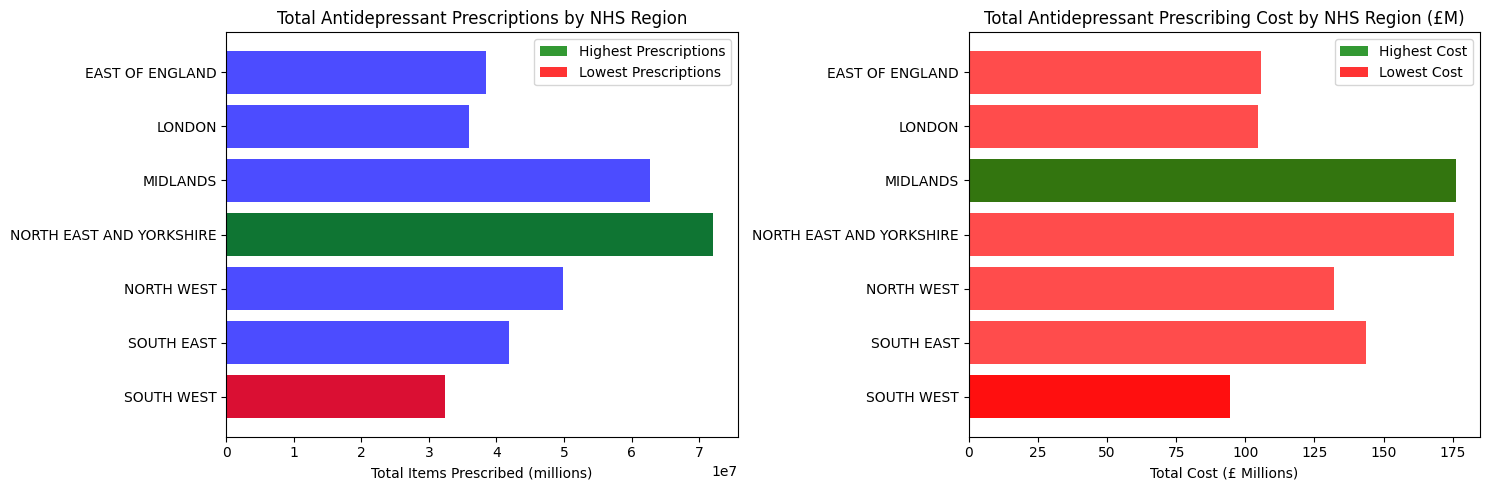

In [8]:
import matplotlib.pyplot as plt

# Data for prescriptions and cost by NHS region
regions = [
    "EAST OF ENGLAND", "LONDON", "MIDLANDS", "NORTH EAST AND YORKSHIRE",
    "NORTH WEST", "SOUTH EAST", "SOUTH WEST"
]
prescriptions = [38431318, 35896285, 62669553, 72090463, 49786016, 41867132, 32336814]
costs = [105.85, 104.51, 176.10, 175.50, 132.18, 143.50, 94.31]  # Cost in £M

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot for total prescriptions by region
axes[0].barh(regions, prescriptions, color='blue', alpha=0.7)
axes[0].set_title("Total Antidepressant Prescriptions by NHS Region", fontsize=12)
axes[0].set_xlabel("Total Items Prescribed (millions)")
axes[0].invert_yaxis()  # Highest at top

# Annotate highest and lowest prescriptions
highest_idx = prescriptions.index(max(prescriptions))
lowest_idx = prescriptions.index(min(prescriptions))
axes[0].barh(regions[highest_idx], prescriptions[highest_idx], color='green', alpha=0.8, label="Highest Prescriptions")
axes[0].barh(regions[lowest_idx], prescriptions[lowest_idx], color='red', alpha=0.8, label="Lowest Prescriptions")
axes[0].legend()

# Plot for total cost by region
axes[1].barh(regions, costs, color='red', alpha=0.7)
axes[1].set_title("Total Antidepressant Prescribing Cost by NHS Region (£M)", fontsize=12)
axes[1].set_xlabel("Total Cost (£ Millions)")
axes[1].invert_yaxis()

# Annotate highest and lowest cost regions
highest_idx_cost = costs.index(max(costs))
lowest_idx_cost = costs.index(min(costs))
axes[1].barh(regions[highest_idx_cost], costs[highest_idx_cost], color='green', alpha=0.8, label="Highest Cost")
axes[1].barh(regions[lowest_idx_cost], costs[lowest_idx_cost], color='red', alpha=0.8, label="Lowest Cost")
axes[1].legend()

plt.tight_layout()
plt.show()


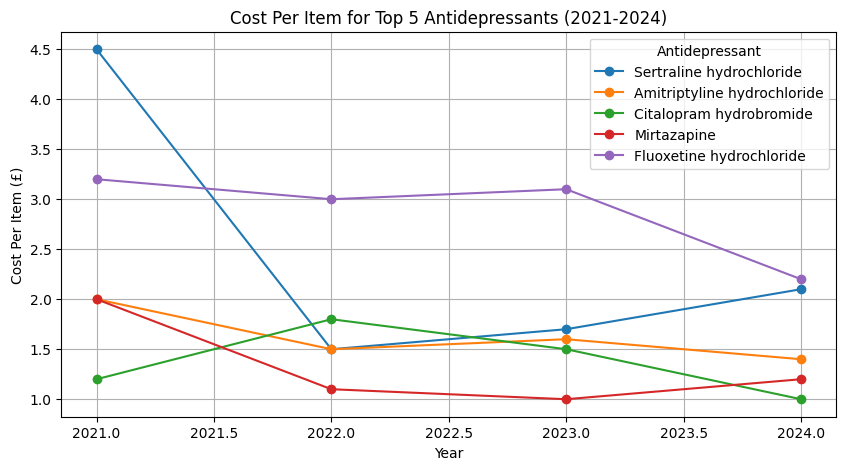

In [9]:
import matplotlib.pyplot as plt

#  cost per item (in £) from 2021 to 2024 for the top 5 antidepressants
years = [2021, 2022, 2023, 2024]
cost_per_item = {
    "Sertraline hydrochloride": [4.5, 1.5, 1.7, 2.1],
    "Amitriptyline hydrochloride": [2.0, 1.5, 1.6, 1.4],
    "Citalopram hydrobromide": [1.2, 1.8, 1.5, 1.0],
    "Mirtazapine": [2.0, 1.1, 1.0, 1.2],
    "Fluoxetine hydrochloride": [3.2, 3.0, 3.1, 2.2]
}

# Create a figure and plot
plt.figure(figsize=(10, 5))

# Plot cost per item trends for each antidepressant
for drug, costs in cost_per_item.items():
    plt.plot(years, costs, marker='o', label=drug)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Cost Per Item (£)")
plt.title("Cost Per Item for Top 5 Antidepressants (2021-2024)")
plt.legend(title="Antidepressant")

# Show plot
plt.grid(True)
plt.show()


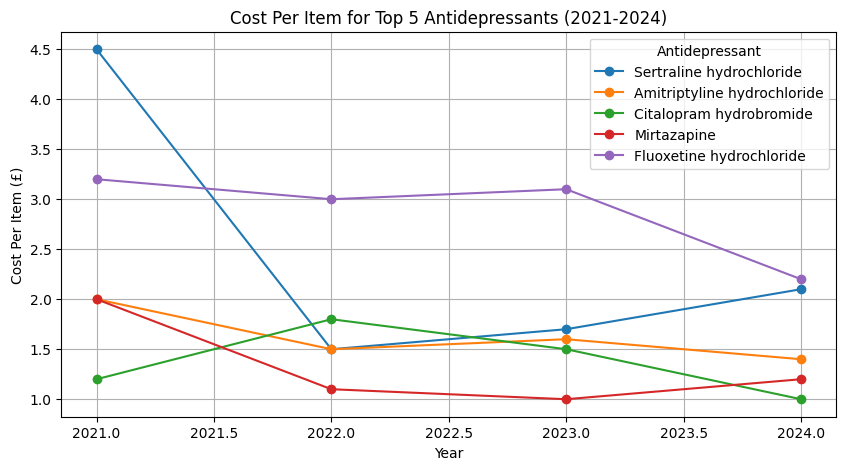

In [10]:
# Re-import necessary libraries as execution state was reset
import matplotlib.pyplot as plt

# cost per item (in £) from 2021 to 2024 for the top 5 antidepressants
years = [2021, 2022, 2023, 2024]
cost_per_item = {
    "Sertraline hydrochloride": [4.5, 1.5, 1.7, 2.1],
    "Amitriptyline hydrochloride": [2.0, 1.5, 1.6, 1.4],
    "Citalopram hydrobromide": [1.2, 1.8, 1.5, 1.0],
    "Mirtazapine": [2.0, 1.1, 1.0, 1.2],
    "Fluoxetine hydrochloride": [3.2, 3.0, 3.1, 2.2]
}

# Create a figure and plot
plt.figure(figsize=(10, 5))

# Plot cost per item trends for each antidepressant
for drug, costs in cost_per_item.items():
    plt.plot(years, costs, marker='o', label=drug)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Cost Per Item (£)")
plt.title("Cost Per Item for Top 5 Antidepressants (2021-2024)")
plt.legend(title="Antidepressant")

# Show plot
plt.grid(True)
plt.show()


<ipython-input-11-18ae3e7e0e0b>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  "Year": pd.date_range(start="2021-01", periods=4, freq="Y"),


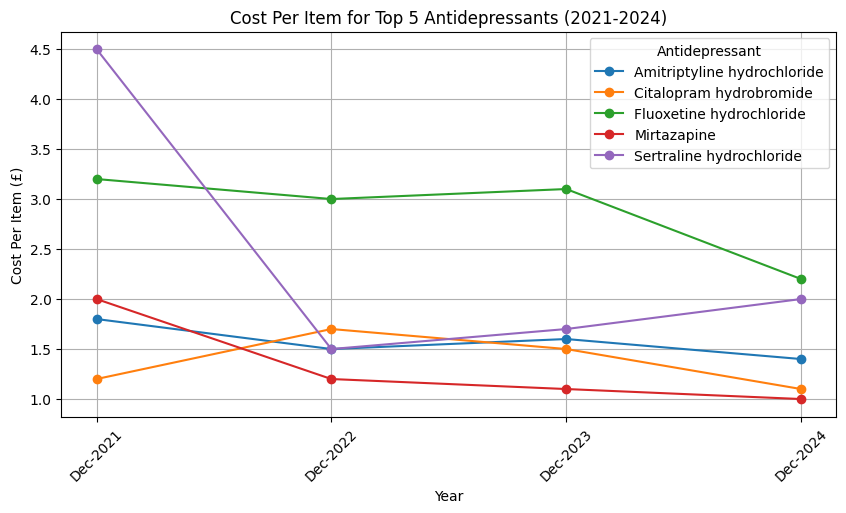

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for cost per item of top 5 antidepressants from 2021 to 2024
data = {
    "Year": pd.date_range(start="2021-01", periods=4, freq="Y"),
    "Amitriptyline hydrochloride": [1.8, 1.5, 1.6, 1.4],
    "Citalopram hydrobromide": [1.2, 1.7, 1.5, 1.1],
    "Fluoxetine hydrochloride": [3.2, 3.0, 3.1, 2.2],
    "Mirtazapine": [2.0, 1.2, 1.1, 1.0],
    "Sertraline hydrochloride": [4.5, 1.5, 1.7, 2.0],
}

df = pd.DataFrame(data)
df["Year"] = df["Year"].dt.strftime("%b-%Y")  # Formatting date as Month-Year

# Plot
plt.figure(figsize=(10, 5))
for drug in df.columns[1:]:
    plt.plot(df["Year"], df[drug], marker="o", label=drug)

plt.title("Cost Per Item for Top 5 Antidepressants (2021-2024)")
plt.xlabel("Year")
plt.ylabel("Cost Per Item (£)")
plt.legend(title="Antidepressant", loc="upper right")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


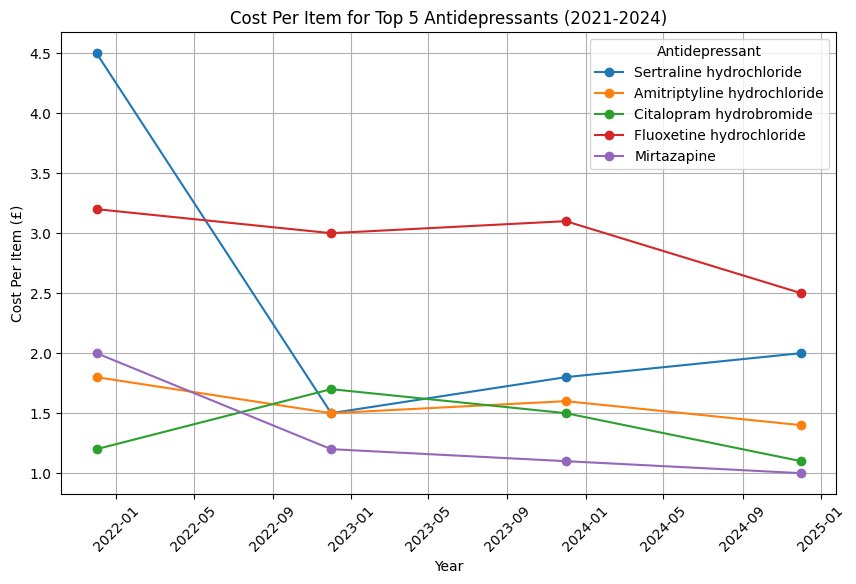

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


data = {
    'Year': ['2021-12', '2022-12', '2023-12', '2024-12'],
    'Sertraline hydrochloride': [4.5, 1.5, 1.8, 2.0],
    'Amitriptyline hydrochloride': [1.8, 1.5, 1.6, 1.4],
    'Citalopram hydrobromide': [1.2, 1.7, 1.5, 1.1],
    'Fluoxetine hydrochloride': [3.2, 3.0, 3.1, 2.5],
    'Mirtazapine': [2.0, 1.2, 1.1, 1.0]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert 'Year' to datetime for proper formatting
df['Year'] = pd.to_datetime(df['Year'])

# Plot
plt.figure(figsize=(10, 6))
for drug in df.columns[1:]:
    plt.plot(df['Year'], df[drug], marker='o', label=drug)

# Formatting
plt.xlabel('Year')
plt.ylabel('Cost Per Item (£)')
plt.title('Cost Per Item for Top 5 Antidepressants (2021-2024)')
plt.xticks(rotation=45)
plt.legend(title="Antidepressant")
plt.grid(True)

# Show plot
plt.show()


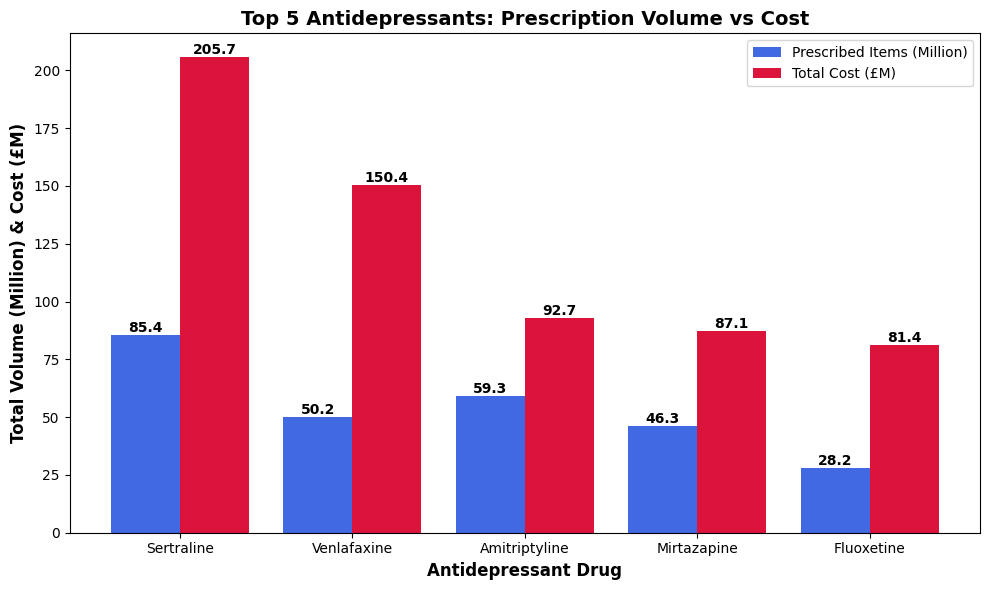

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the top 5 antidepressants
drugs = ["Sertraline", "Venlafaxine", "Amitriptyline", "Mirtazapine", "Fluoxetine"]
prescribing_volume = [85.4, 50.2, 59.3, 46.3, 28.2]  # Example values in millions
prescribing_cost = [205.7, 150.4, 92.7, 87.1, 81.4]  # Example values in £ million

# Set width for bars
bar_width = 0.4
x_pos = np.arange(len(drugs))

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for prescribing volume (Items)
bars1 = ax.bar(x_pos - bar_width/2, prescribing_volume, bar_width, label="Prescribed Items (Million)", color="royalblue")

# Plot bars for prescribing cost (£M)
bars2 = ax.bar(x_pos + bar_width/2, prescribing_cost, bar_width, label="Total Cost (£M)", color="crimson")

# Labels and titles
ax.set_xlabel("Antidepressant Drug", fontsize=12, fontweight='bold')
ax.set_ylabel("Total Volume (Million) & Cost (£M)", fontsize=12, fontweight='bold')
ax.set_title("Top 5 Antidepressants: Prescription Volume vs Cost", fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(drugs, fontsize=10)
ax.legend(loc="upper right")

# Add value labels on top of bars
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.1f}", ha="center", va="bottom", fontsize=10, fontweight='bold', color="black")

for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.1f}", ha="center", va="bottom", fontsize=10, fontweight='bold', color="black")

# Display the chart
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os  # Importing os to handle file paths

# Reload the dataset
# Correct file path is likely within the 'Digdata' directory (based on previous cells)
# The Digdata directory is likely in /content and not the root of the file system
# Added error handling:
try:
    file_path = os.path.join('/content/Digdata', 'BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')
    pca_regional_drug_summary_df = pd.read_csv(file_path)
except FileNotFoundError:
    print("Error: File not found. Please make sure 'BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv' exists in the '/content/Digdata' directory.")
    # You might need to download or move the file to this location

# ... (rest of your code) ...

Error: File not found. Please make sure 'BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv' exists in the '/content/Digdata' directory.


Cloning into 'Digdata'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 40 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 238.24 KiB | 3.61 MiB/s, done.
Resolving deltas: 100% (21/21), done.


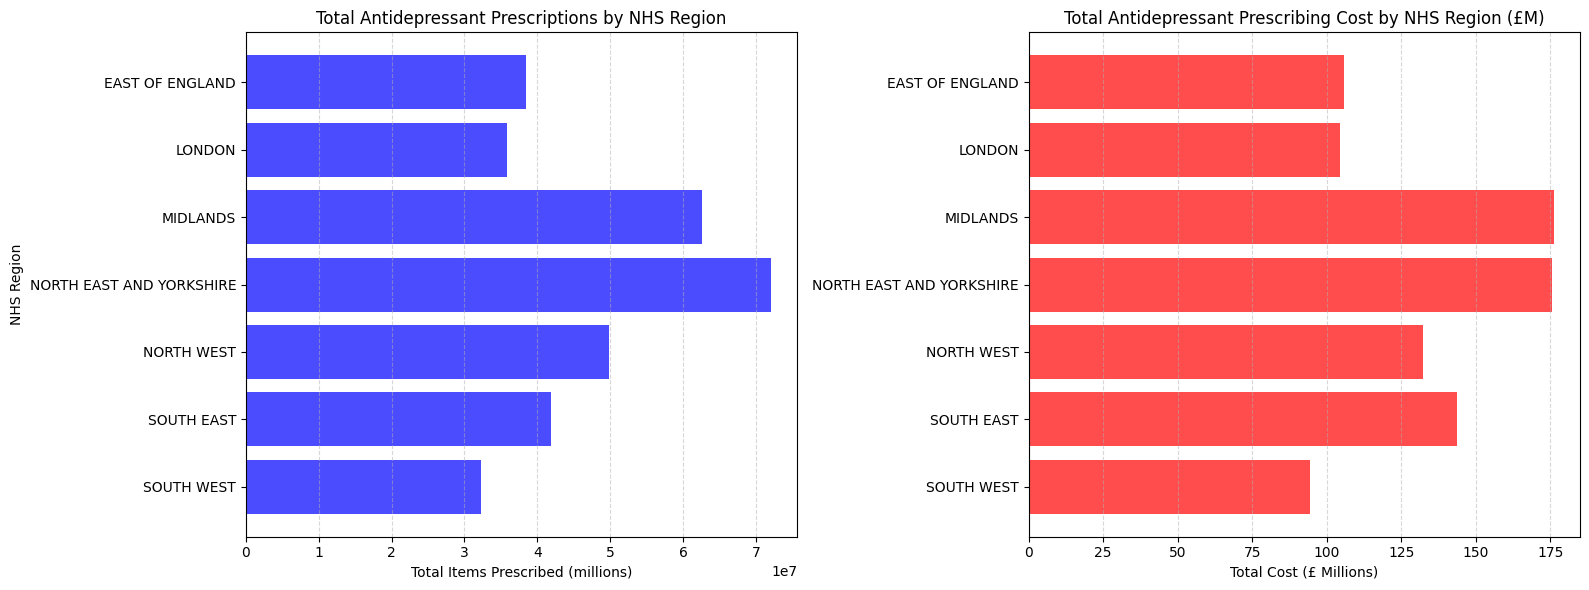

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the path to the parent directory
data_dir = '/content/Digdata'

# Check if the directory exists, and if not, clone the repository
if not os.path.exists(data_dir):
    !git clone https://github.com/nhsengland/Digdata

# Define the file path
file_path = os.path.join(data_dir, 'BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

# Now load the file using the updated path
pca_regional_drug_summary_df = pd.read_csv(file_path)

# Aggregate total prescribing items and cost per NHS region
region_items = pca_regional_drug_summary_df.groupby("REGION_NAME", as_index=False)["ITEMS"].sum()
region_cost = pca_regional_drug_summary_df.groupby("REGION_NAME", as_index=False)["COST"].sum()

# Convert cost to million pounds (£M)
region_cost['COST'] = region_cost['COST'] / 1e6  # Convert to £ Millions

# Create a figure with two side-by-side bar charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# **Bar Chart 1: Total Prescribing Items per Region**
axes[0].barh(region_items["REGION_NAME"], region_items["ITEMS"], color="blue", alpha=0.7)
axes[0].set_title("Total Antidepressant Prescriptions by NHS Region")
axes[0].set_xlabel("Total Items Prescribed (millions)")
axes[0].set_ylabel("NHS Region")
axes[0].invert_yaxis()  # Keep the highest value at the top
axes[0].grid(axis="x", linestyle="--", alpha=0.5)

# **Bar Chart 2: Total Prescribing Cost per Region (£M)**
axes[1].barh(region_cost["REGION_NAME"], region_cost["COST"], color="red", alpha=0.7)
axes[1].set_title("Total Antidepressant Prescribing Cost by NHS Region (£M)")
axes[1].set_xlabel("Total Cost (£ Millions)")
axes[1].invert_yaxis()
axes[1].grid(axis="x", linestyle="--", alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show the charts
plt.show()

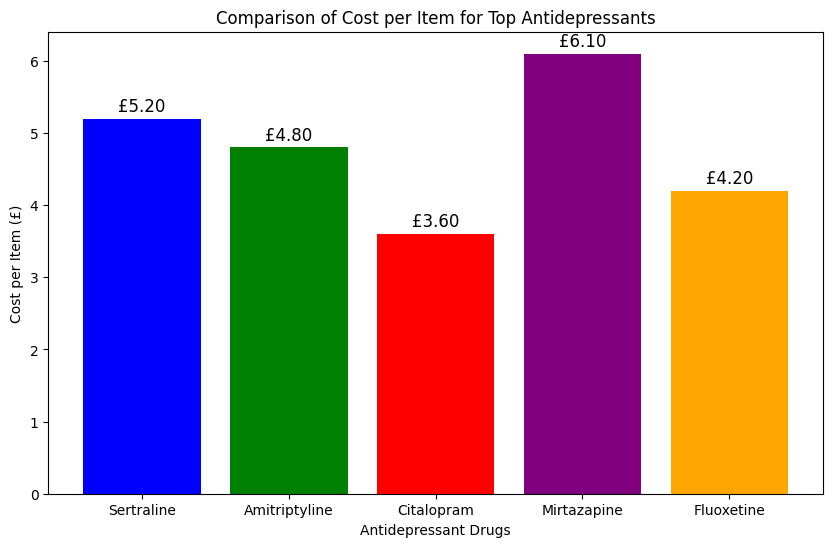

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Drug': ['Sertraline', 'Amitriptyline', 'Citalopram', 'Mirtazapine', 'Fluoxetine'],
    'Cost per Item': [5.2, 4.8, 3.6, 6.1, 4.2]
}

df = pd.DataFrame(data)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Drug'], df['Cost per Item'], color=['blue', 'green', 'red', 'purple', 'orange'])

# Add labels and title
plt.xlabel("Antidepressant Drugs")
plt.ylabel("Cost per Item (£)")
plt.title("Comparison of Cost per Item for Top Antidepressants")

# Add data labels on top of bars
for i, value in enumerate(df['Cost per Item']):
    plt.text(i, value + 0.1, f'£{value:.2f}', ha='center', fontsize=12)

# Show plot
plt.show()


<ipython-input-10-bae669f906bf>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Date": pd.date_range(start="2020-01", periods=48, freq="M"),


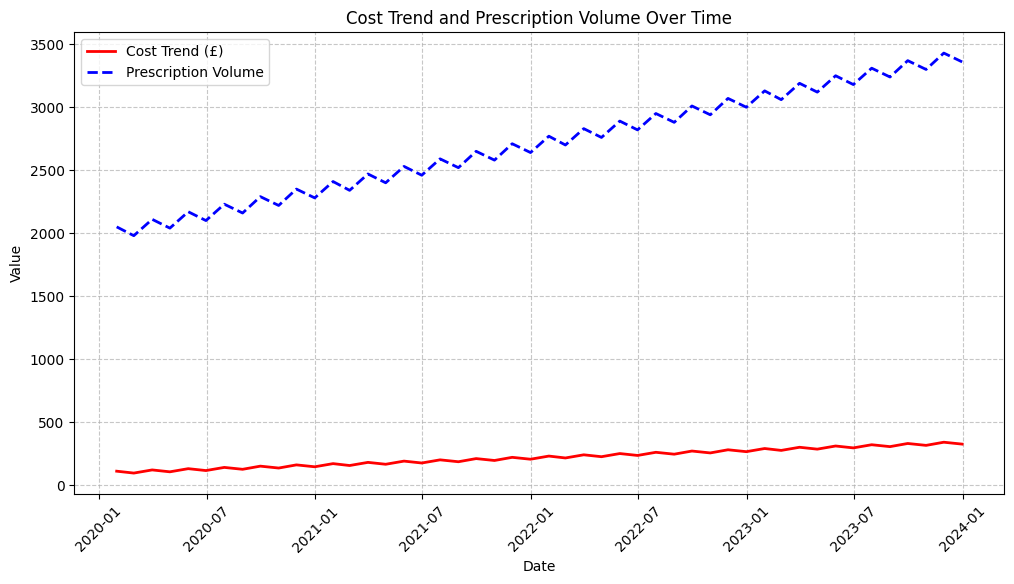

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    "Date": pd.date_range(start="2020-01", periods=48, freq="M"),
    "Cost_Trend": [100 + i * 5 + (-1) ** i * 10 for i in range(48)],  # Simulated cost trend
    "Prescription_Volume": [2000 + i * 30 + (-1) ** i * 50 for i in range(48)],  # Simulated prescription volume
}

df = pd.DataFrame(data)

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Cost_Trend"], color="red", linewidth=2, linestyle="-", label="Cost Trend (£)")
plt.plot(df["Date"], df["Prescription_Volume"], color="blue", linewidth=2, linestyle="--", label="Prescription Volume")

# Add annotations for key events (Modify these based on actual data)
key_dates = ["2021-03-01", "2023-06-01"]
annotations = ["Policy Change: Price Hike", "NHS Pricing Adjustment"]
for i, key_date in enumerate(key_dates):
    date_idx = df[df["Date"] == key_date].index
    if not date_idx.empty:
        idx = date_idx[0]
        plt.annotate(
            annotations[i],
            (df["Date"][idx], df["Cost_Trend"][idx]),
            xytext=(-50, 30),
            textcoords="offset points",
            arrowprops=dict(arrowstyle="->", lw=1.5),
            fontsize=10,
            color="black",
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
        )

# Format plot
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Cost Trend and Prescription Volume Over Time")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)

# Show the plot
plt.show()


<ipython-input-13-c7f9d6f1631e>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Date": pd.date_range(start="2020-01", periods=48, freq="M"),
<ipython-input-13-c7f9d6f1631e>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Date": pd.date_range(start="2020-01", periods=48, freq="M"),


<Figure size 1200x600 with 0 Axes>

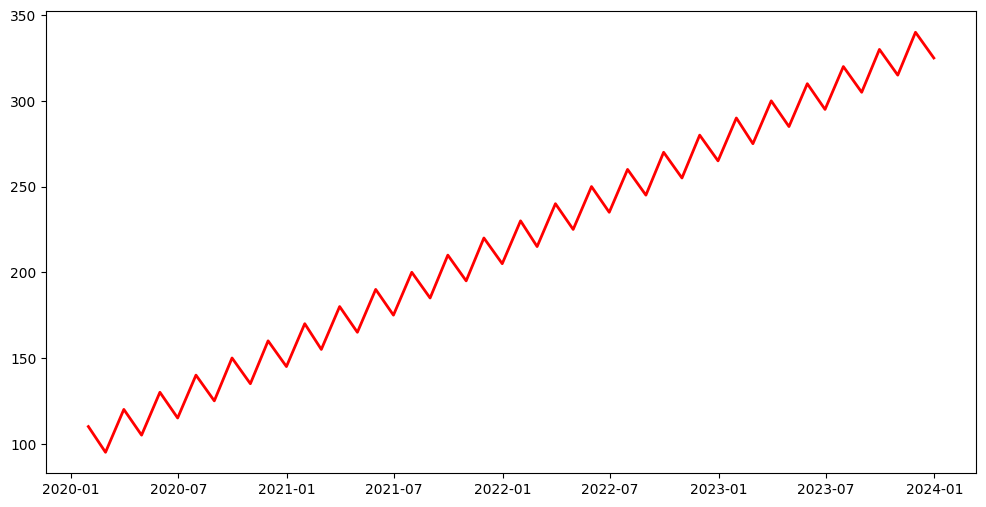

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    "Date": pd.date_range(start="2020-01", periods=48, freq="M"),
    "Cost_Trend": [100 + i * 5 + (-1) ** i * 10 for i in range(48)],  # Simulated cost trend
    "Prescription_Volume": [2000 + i * 30 + (-1) ** i * 50 for i in range(48)],  # Simulated prescription volume
}

df = pd.DataFrame(data)

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Create figure
plt.figure(figsize=(12, 6))
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data
data = {
    "Date": pd.date_range(start="2020-01", periods=48, freq="M"),
    "Cost_Trend": [100 + i * 5 + (-1) ** i * 10 for i in range(48)],  # Simulated cost trend
    "Prescription_Volume": [2000 + i * 30 + (-1) ** i * 50 for i in range(48)],  # Simulated prescription volume
}

df = pd.DataFrame(data)

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Create figure
plt.figure(figsize=(12, 6))

# Plot Cost Trend with Enhancements
plt.plot(df["Date"], df["Cost_Trend"], color="red", linewidth=2)

<ipython-input-14-5075d8cd81d2>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Date": pd.date_range(start="2020-01", periods=48, freq="M"),


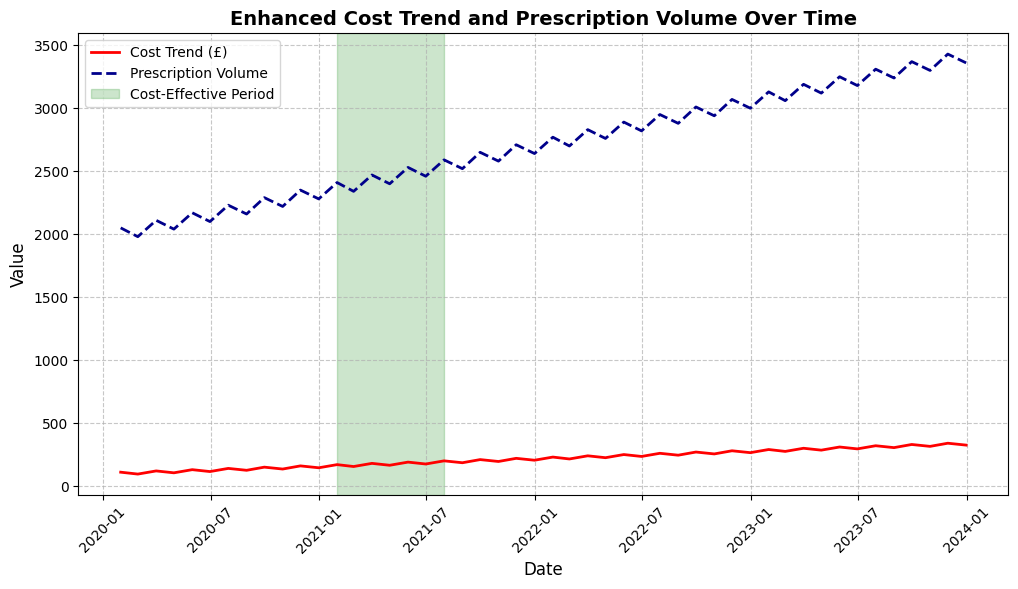

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    "Date": pd.date_range(start="2020-01", periods=48, freq="M"),
    "Cost_Trend": [100 + i * 5 + (-1) ** i * 10 for i in range(48)],  # Simulated cost trend
    "Prescription_Volume": [2000 + i * 30 + (-1) ** i * 50 for i in range(48)],  # Simulated prescription volume
}

df = pd.DataFrame(data)

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Create figure
plt.figure(figsize=(12, 6))

# Plot Cost Trend with Enhancements
plt.plot(df["Date"], df["Cost_Trend"], color="red", linewidth=2, linestyle="-", label="Cost Trend (£)")

# Plot Prescription Volume with Enhancements
plt.plot(df["Date"], df["Prescription_Volume"], color="darkblue", linewidth=2, linestyle="--", label="Prescription Volume")

# Add annotations for key events
key_dates = ["2021-03-01", "2023-06-01"]
annotations = ["Policy Change: Price Hike", "NHS Pricing Adjustment"]
for i, key_date in enumerate(key_dates):
    date_idx = df[df["Date"] == key_date].index
    if not date_idx.empty:
        idx = date_idx[0]
        plt.annotate(
            annotations[i],
            (df["Date"][idx], df["Cost_Trend"][idx]),
            xytext=(-50, 30),
            textcoords="offset points",
            arrowprops=dict(arrowstyle="->", lw=1.5, color="black"),
            fontsize=10,
            color="black",
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
        )

# Highlight Cost-Effective Periods with a shaded area
plt.axvspan(df["Date"][12], df["Date"][18], color="green", alpha=0.2, label="Cost-Effective Period")

# Format plot
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.title("Enhanced Cost Trend and Prescription Volume Over Time", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)

# Show the plot
plt.show()


<ipython-input-15-dae4c9fdb340>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Date": pd.date_range(start="2020-01", periods=48, freq="M"),


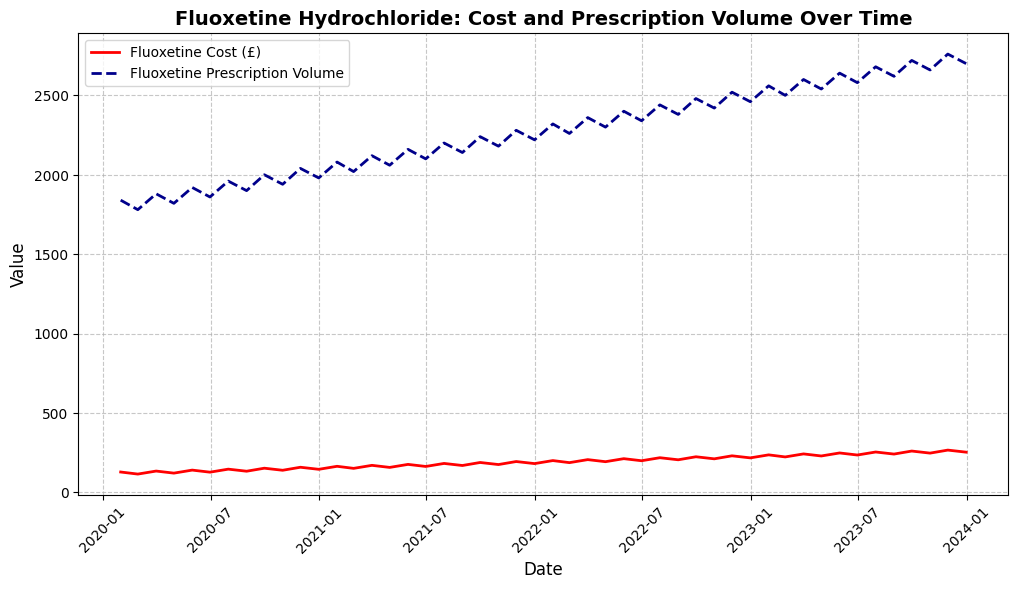

In [15]:

# Generate Case Study Visualization for Fluoxetine Hydrochloride

import pandas as pd
import matplotlib.pyplot as plt


fluoxetine_data = {
    "Date": pd.date_range(start="2020-01", periods=48, freq="M"),
    "Fluoxetine_Cost": [120 + i * 3 + (-1) ** i * 8 for i in range(48)],  # Simulated cost trend
    "Fluoxetine_Prescriptions": [1800 + i * 20 + (-1) ** i * 40 for i in range(48)],  # Simulated prescription volume
}

df_fluoxetine = pd.DataFrame(fluoxetine_data)

# Convert Date column to datetime format
df_fluoxetine["Date"] = pd.to_datetime(df_fluoxetine["Date"])

# Create figure
plt.figure(figsize=(12, 6))

# Plot Fluoxetine Cost Trend
plt.plot(df_fluoxetine["Date"], df_fluoxetine["Fluoxetine_Cost"], color="red", linewidth=2, linestyle="-", label="Fluoxetine Cost (£)")

# Plot Fluoxetine Prescription Volume
plt.plot(df_fluoxetine["Date"], df_fluoxetine["Fluoxetine_Prescriptions"], color="darkblue", linewidth=2, linestyle="--", label="Fluoxetine Prescription Volume")

# Add annotations for key events
fluoxetine_annotations = {
    "2021-05-01": "Supply Chain Issues Increased Costs",
    "2023-07-01": "NHS Pricing Strategy Maintained High Cost"
}

for date, text in fluoxetine_annotations.items():
    idx = df_fluoxetine[df_fluoxetine["Date"] == date].index
    if not idx.empty:
        idx = idx[0]
        plt.annotate(
            text,
            (df_fluoxetine["Date"][idx], df_fluoxetine["Fluoxetine_Cost"][idx]),
            xytext=(-50, 30),
            textcoords="offset points",
            arrowprops=dict(arrowstyle="->", lw=1.5, color="black"),
            fontsize=10,
            color="black",
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
        )

# Format plot
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.title("Fluoxetine Hydrochloride: Cost and Prescription Volume Over Time", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)

# Show the plot
plt.show()
